#### Context    
> A person makes a doctor appointment, receives all the instructions and no-show. Who to blame?    
> If this help you studying or working, please don´t forget to upvote :). Reference to Joni Hoppen and Aquarela Advanced Analytics Aquarela    
>     
> Greetings!    
>     
#### Content    
> 110.527 medical appointments its 14 associated variables (characteristics). The most important one if the patient show-up or no-show to the appointment. Variable names are self-explanatory, if you have doubts, just let me know!    
>     
> scholarship variable means this concept = https://en.wikipedia.org/wiki/Bolsa_Família    
>     
> 14 variables    
>     
#### Data Dictionary    
> 01 - PatientId    
> Identification of a patient    
> 02 - AppointmentID    
> Identification of each appointment    
> 03 - Gender    
> Male or Female . Female is the greater proportion, woman takes way more care of they health in comparison to man.    
> 04 - ScheduledDay    
> The day of the actuall appointment, when they have to visit the doctor.    
> 05 - AppointmentDay   
> The day someone called or registered the appointment, this is before appointment of course.    
> 06 - Age    
> How old is the patient.    
> 07 - Neighbourhood    
> Where the appointment takes place.    
> 08 - Scholarship    
> True of False . Observation, this is a broad topic, consider reading this article https://en.wikipedia.org/wiki/Bolsa_Família    
> 09 - Hipertension    
> True or False    
> 10 - Diabetes    
> True or False    
> Alcoholism    
> True or False    
> Handcap    
> True or False    
> SMS_received    
> 1 or more messages sent to the patient.    
> No-show    
> True or False.    
> Inspiration    
> What if that possible to predict someone to no-show an appointment?    


#### 1- Gerekli paketleri yükleyelim

In [446]:


import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.io as pio

import scipy.stats as stats
from statistics import mean 
from scipy.stats.mstats import winsorize
import warnings


warnings.filterwarnings('ignore')
df = pd.read_csv('data/KaggleV2-May-2016.csv',  low_memory=False)

title_style = {'family': 'Century Gothic', 'color': 'darkred', 'size': 20 }
axis_style  = {'family': 'Century Gothic', 'color': 'darkblue', 'size': 15 }

In [447]:
df.sort_values(by=['Age'])
#Yaşları küçükten büyüğe listeliyorum

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
99832,4.659432e+14,5775010,F,2016-06-06T08:58:13Z,2016-06-06T00:00:00Z,-1,ROMÃO,0,0,0,0,0,0,No
34218,3.469431e+12,5649465,F,2016-05-03T06:57:26Z,2016-05-09T00:00:00Z,0,REDENÇÃO,0,0,0,0,0,0,Yes
102834,4.882675e+10,5659726,F,2016-05-04T14:35:59Z,2016-06-01T00:00:00Z,0,MARUÍPE,0,0,0,0,0,1,No
102832,9.726846e+12,5749887,F,2016-05-31T08:19:38Z,2016-06-01T00:00:00Z,0,MARUÍPE,0,0,0,0,0,0,No
102830,2.845290e+13,5664173,M,2016-05-05T11:24:09Z,2016-06-08T00:00:00Z,0,SÃO CRISTÓVÃO,0,0,0,0,0,1,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63915,3.196321e+13,5700279,F,2016-05-16T09:17:44Z,2016-05-19T00:00:00Z,115,ANDORINHAS,0,0,0,0,1,0,Yes
76284,3.196321e+13,5744037,F,2016-05-30T09:44:51Z,2016-05-30T00:00:00Z,115,ANDORINHAS,0,0,0,0,1,0,No
68127,3.196321e+13,5562812,F,2016-04-08T14:29:17Z,2016-05-16T00:00:00Z,115,ANDORINHAS,0,0,0,0,1,0,Yes
63912,3.196321e+13,5700278,F,2016-05-16T09:17:44Z,2016-05-19T00:00:00Z,115,ANDORINHAS,0,0,0,0,1,0,Yes


### Checking for errors and NaNs


#### 2- 'Yaş' kolonunda -1 değerlerini atalım.

In [448]:
df=df[df['Age']>=0]

#### 3-NaN veri Kontrolü

In [449]:
df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

In [450]:
df[pd.isnull(df).any(axis=1)]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show


In [451]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110526 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110526 non-null  float64
 1   AppointmentID   110526 non-null  int64  
 2   Gender          110526 non-null  object 
 3   ScheduledDay    110526 non-null  object 
 4   AppointmentDay  110526 non-null  object 
 5   Age             110526 non-null  int64  
 6   Neighbourhood   110526 non-null  object 
 7   Scholarship     110526 non-null  int64  
 8   Hipertension    110526 non-null  int64  
 9   Diabetes        110526 non-null  int64  
 10  Alcoholism      110526 non-null  int64  
 11  Handcap         110526 non-null  int64  
 12  SMS_received    110526 non-null  int64  
 13  No-show         110526 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 12.6+ MB


#### 4-Object Tipleri Dönüştürelim

In [452]:
df =df.replace({'No-show': {'Yes': True, 'No': False}})

In [453]:
df =df.replace({'Gender': {'F': 0, 'M': 1}})

#### AppointmentDay ve ScheduledDay tipi object. Bunları datetime formatına dönüştürelim

In [454]:
df['AppointmentDay']=pd.to_datetime(df["AppointmentDay"])
df['ScheduledDay']=pd.to_datetime(df["ScheduledDay"])


In [455]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110526 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype              
---  ------          --------------   -----              
 0   PatientId       110526 non-null  float64            
 1   AppointmentID   110526 non-null  int64              
 2   Gender          110526 non-null  int64              
 3   ScheduledDay    110526 non-null  datetime64[ns, UTC]
 4   AppointmentDay  110526 non-null  datetime64[ns, UTC]
 5   Age             110526 non-null  int64              
 6   Neighbourhood   110526 non-null  object             
 7   Scholarship     110526 non-null  int64              
 8   Hipertension    110526 non-null  int64              
 9   Diabetes        110526 non-null  int64              
 10  Alcoholism      110526 non-null  int64              
 11  Handcap         110526 non-null  int64              
 12  SMS_received    110526 non-null  int64              
 13  No-show       

#### 5-Kategorik değişkenleri belirleyelim:

In [456]:
df.nunique() 

PatientId          62298
AppointmentID     110526
Gender                 2
ScheduledDay      103548
AppointmentDay        27
Age                  103
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

In [457]:
df.describe(include=['O'])

,Neighbourhood
count,110526
unique,81
top,JARDIM CAMBURI
freq,7717


In [458]:
df.describe()


,PatientId,AppointmentID,Gender,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105260e+05,1.105260e+05,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000
mean,1.474934e+14,5.675304e+06,0.350026,37.089219,0.098266,0.197248,0.071865,0.030400,0.022248,0.321029
std,2.560943e+14,7.129544e+04,0.476980,23.110026,0.297676,0.397923,0.258266,0.171686,0.161543,0.466874
min,3.921784e+04,5.030230e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172536e+12,5.640285e+06,0.000000,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680572e+06,0.000000,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.438963e+13,5.725523e+06,1.000000,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,1.000000,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [459]:
##df2=df.drop_duplicates(subset=["PatientId","AppointmentDay"], keep='first', inplace=False, ignore_index=False)

#### 6-Katılım Oranları (No:Katıldı, Yes:Katılmadı)

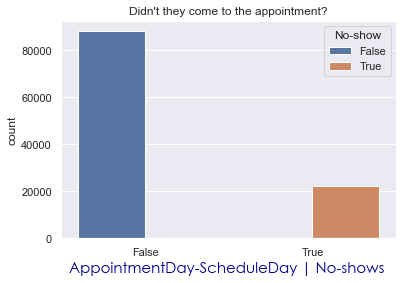

In [460]:
colors = ['lightcoral','yellowgreen']

ax2 = sns.countplot(x="No-show", hue="No-show", data=df)
plt.title("Didn't they come to the appointment?")
plt.xlabel('AppointmentDay-ScheduleDay | No-shows ',fontdict = axis_style)


plt.show()

#### Randevuya Katılım Oranı Yüzdesi

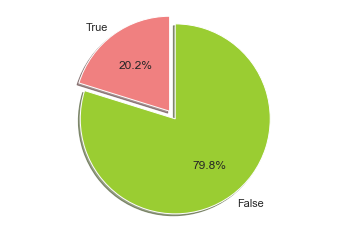

In [461]:
nstrue=df[df["No-show"]==True]["No-show"].count()
nstruepercent=nstrue/df["No-show"].count()*100
nsfalsepercent=100-nstruepercent



labels = 'True', 'False'
sizes = [nstruepercent, nsfalsepercent]
explode = (0.1, 0)  


fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels,colors=colors, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal') 

plt.show()

#### 7-Randevuya katılmayan kadın ve erkeklerin yüzdesini hesaplayalım

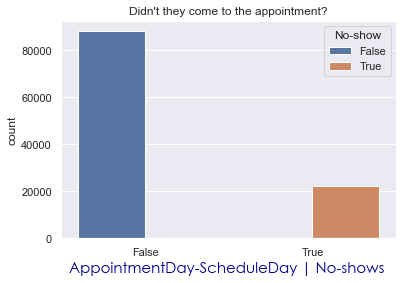

In [462]:
ax = sns.countplot(x="No-show", hue="No-show", data=df)
plt.title("Didn't they come to the appointment?")
plt.xlabel('AppointmentDay-ScheduleDay | No-shows ',fontdict = axis_style)
plt.show()

In [463]:
df.groupby("Gender")["Gender"].count()

Gender
0    71839
1    38687
Name: Gender, dtype: int64

#### 8-Cinsiyete Göre Randevulara Katılım Oranları

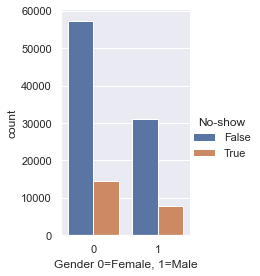

In [464]:
g = sns.catplot(x="Gender", hue="No-show",
                data=df, kind="count",
                height=4, aspect=.7);
g.set(xlabel='Gender 0=Female, 1=Male')
plt.show()

In [465]:
totalf=df.groupby("Gender")["Gender"].count()[0]  ##Total Female
totalm=df.groupby("Gender")["Gender"].count()[1]  ##Total Male

yesf=df[df['No-show']==True].groupby("Gender")["Gender"].count()[0]
yesm=df[df['No-show']==True].groupby("Gender")["Gender"].count()[1]
yespercentagef=yesf/(totalf)*100
yespercentagem=yesm/(totalm)*100


#### 9-Cinsiyete Göre Randevulara Katılmama Oranı

In [466]:
print("Percentage of female not attending the appointment")
print(yespercentagef)

print("Percentage of male not attending the appointment")
print(yespercentagem)


Percentage of female not attending the appointment
20.314870752655242
Percentage of male not attending the appointment
19.967947889471915


> Randevulara gelen kadın ve erkek oranlarında pek bir fark yok

In [467]:
(df.AppointmentDay)-(df.ScheduledDay)

0        -1 days +05:21:52
1        -1 days +07:51:33
2        -1 days +07:40:56
3        -1 days +06:30:29
4        -1 days +07:52:37
                ...       
110522    34 days 14:44:25
110523    34 days 16:32:27
110524    40 days 07:56:08
110525    40 days 08:50:37
110526    40 days 10:29:04
Length: 110526, dtype: timedelta64[ns]

#### 10-Randevular kaç gün önce alınmış ?

In [468]:
df["days"]=(df["AppointmentDay"]-df["ScheduledDay"]).dt.days
df.sort_values(by=['days'])


,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,days
71533,9.982316e+14,5686628,0,2016-05-11 13:49:20+00:00,2016-05-05 00:00:00+00:00,81,SANTO ANTÔNIO,0,0,0,0,0,0,True,-7
72362,3.787482e+12,5655637,1,2016-05-04 06:50:57+00:00,2016-05-03 00:00:00+00:00,7,TABUAZEIRO,0,0,0,0,0,0,True,-2
64175,2.425226e+13,5664962,0,2016-05-05 13:43:58+00:00,2016-05-04 00:00:00+00:00,22,CONSOLAÇÃO,0,0,0,0,0,0,True,-2
55226,7.896294e+12,5715660,0,2016-05-18 14:50:41+00:00,2016-05-17 00:00:00+00:00,19,SANTO ANTÔNIO,0,0,0,0,1,0,True,-2
27033,7.839273e+12,5679978,1,2016-05-10 10:51:53+00:00,2016-05-09 00:00:00+00:00,38,RESISTÊNCIA,0,0,0,0,1,0,True,-2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102789,3.112342e+13,5134239,0,2015-12-07 10:44:25+00:00,2016-06-03 00:00:00+00:00,60,SÃO CRISTÓVÃO,0,1,1,0,0,1,False,178
102788,2.547555e+14,5134249,0,2015-12-07 10:45:01+00:00,2016-06-03 00:00:00+00:00,63,SÃO CRISTÓVÃO,0,1,1,0,0,1,False,178
102786,4.542871e+11,5134227,1,2015-12-07 10:43:34+00:00,2016-06-03 00:00:00+00:00,67,MARUÍPE,0,1,1,0,0,0,False,178
102792,3.512659e+14,5134233,1,2015-12-07 10:44:07+00:00,2016-06-03 00:00:00+00:00,73,MARUÍPE,0,1,1,0,1,0,True,178


#### "days" kolonunda negatif olan değerlerin Aynı gün randevu alınmış gibi varsayıyorum

In [469]:
negativedays=df["days"]


In [470]:
negativedays[negativedays<0]=0
df["days"]=negativedays

In [471]:
df.sort_values(by=['days'])

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,days
0,2.987250e+13,5642903,0,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,False,0
59680,4.857719e+13,5708254,0,2016-05-17 10:53:42+00:00,2016-05-17 00:00:00+00:00,72,SANTA LUÍZA,0,0,0,0,0,0,False,0
59681,8.943385e+14,5707946,1,2016-05-17 10:22:48+00:00,2016-05-17 00:00:00+00:00,23,PRAIA DO CANTO,0,0,0,0,0,0,False,0
59682,5.224722e+13,5708178,0,2016-05-17 10:43:06+00:00,2016-05-17 00:00:00+00:00,27,PRAIA DO CANTO,0,0,0,0,0,0,False,0
59683,8.985873e+13,5708169,1,2016-05-17 10:42:19+00:00,2016-05-17 00:00:00+00:00,0,BARRO VERMELHO,0,0,0,0,0,0,False,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102790,9.965348e+14,5134243,1,2015-12-07 10:44:40+00:00,2016-06-03 00:00:00+00:00,73,MARUÍPE,0,1,1,0,0,0,False,178
102789,3.112342e+13,5134239,0,2015-12-07 10:44:25+00:00,2016-06-03 00:00:00+00:00,60,SÃO CRISTÓVÃO,0,1,1,0,0,1,False,178
102788,2.547555e+14,5134249,0,2015-12-07 10:45:01+00:00,2016-06-03 00:00:00+00:00,63,SÃO CRISTÓVÃO,0,1,1,0,0,1,False,178
102786,4.542871e+11,5134227,1,2015-12-07 10:43:34+00:00,2016-06-03 00:00:00+00:00,67,MARUÍPE,0,1,1,0,0,0,False,178


#### 11-Gün farkına göre randevuya katılım oranları 

In [472]:
noshowy=df[df['No-show']==True]["days"]

noshown=df[df['No-show']==False]["days"]

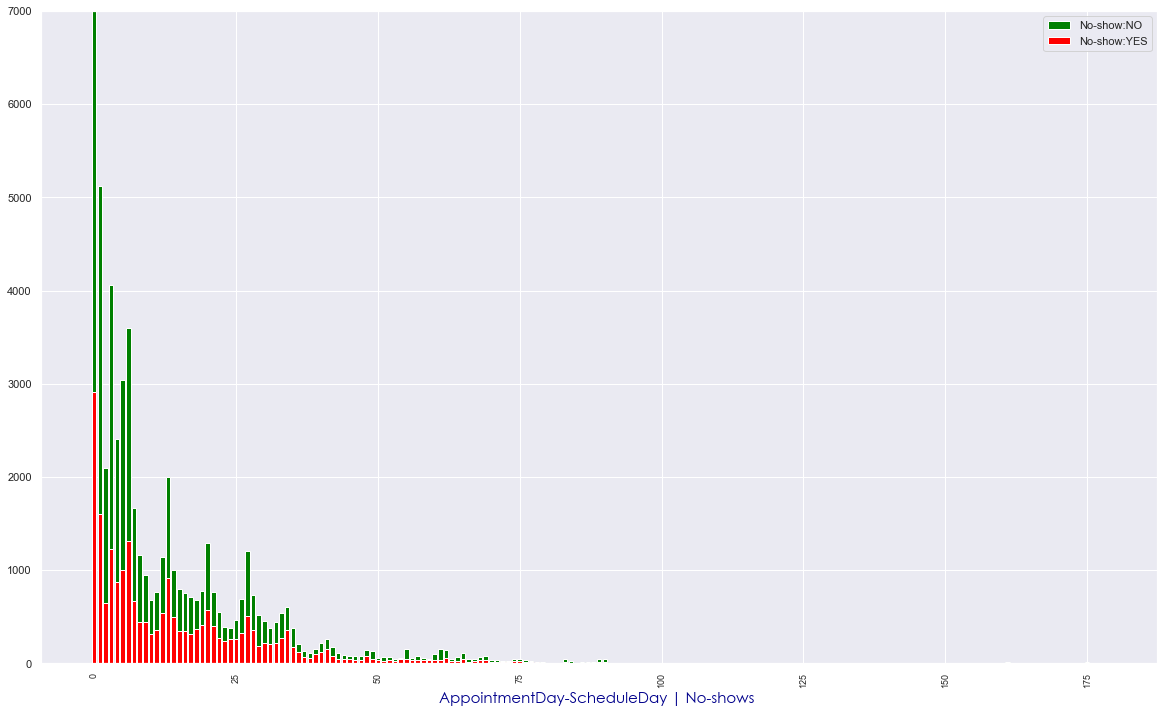

In [473]:
sns.set()
plt.figure(figsize=(20, 12))

plt.subplot(1,1,1)
plt.bar(noshown.value_counts().index,noshown.value_counts(), color = "GREEN",label = 'No-show:NO')
plt.xticks(rotation = 90, fontsize = 9)
plt.xlabel('AppointmentDay-ScheduleDay | No-show:NO ',fontdict = axis_style)

plt.subplot(1,1,1)
plt.bar(noshowy.value_counts().index,noshowy.value_counts(), color = "RED",label = 'No-show:YES')
plt.xticks(rotation = 90, fontsize = 9)
plt.xlabel('AppointmentDay-ScheduleDay | No-shows ',fontdict = axis_style)
plt.ylim(0,7000)
plt.legend()



plt.show() #s smote

> Aynı gün alınan randevulara katılım oranının daha yüksek olduğunu görüyoruz.

In [474]:
plt.figure(figsize=(20, 20))
dayrate=noshown.value_counts()/(noshown.value_counts()+noshowy.value_counts())*100
import plotly.express as px

fig = px.bar(data_frame=dayrate, 
             x=dayrate.index, 
             y=dayrate.values,title="Percentage of customers not attending the daily appointment",
                 labels={"index": "How many days ago",  
                         "y": "rate of attending to appointment"})

fig.show()



<Figure size 1440x1440 with 0 Axes>

In [475]:
def daycategories(day):
    if day==0: return "high"
    elif day<10: return "middle"
    elif day<24: return "low"
    else: return "uncertain"

In [476]:
df.days.apply(daycategories)

0              high
1              high
2              high
3              high
4              high
            ...    
110522    uncertain
110523    uncertain
110524    uncertain
110525    uncertain
110526    uncertain
Name: days, Length: 110526, dtype: object

In [477]:
##df2=df.drop_duplicates(subset=["PatientId","AppointmentDay"], keep='first', inplace=False, ignore_index=False)

In [478]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110526 entries, 0 to 110526
Data columns (total 15 columns):
 #   Column          Non-Null Count   Dtype              
---  ------          --------------   -----              
 0   PatientId       110526 non-null  float64            
 1   AppointmentID   110526 non-null  int64              
 2   Gender          110526 non-null  int64              
 3   ScheduledDay    110526 non-null  datetime64[ns, UTC]
 4   AppointmentDay  110526 non-null  datetime64[ns, UTC]
 5   Age             110526 non-null  int64              
 6   Neighbourhood   110526 non-null  object             
 7   Scholarship     110526 non-null  int64              
 8   Hipertension    110526 non-null  int64              
 9   Diabetes        110526 non-null  int64              
 10  Alcoholism      110526 non-null  int64              
 11  Handcap         110526 non-null  int64              
 12  SMS_received    110526 non-null  int64              
 13  No-show       

#### 12-Aynı tarihte birden fazla randevusu olanların oranı

In [479]:
patientdf=df.groupby(["PatientId","AppointmentDay"]).AppointmentID.count().reset_index()


In [480]:
#patientdf=df.groupby(["PatientId","AppointmentDay"])["AppointmentDay"].count().reset_index()
#patientdf2=patientdf[patientdf>1]

merge=pd.merge(df, patientdf, left_on= ['PatientId','AppointmentDay'], right_on= ['PatientId','AppointmentDay'],how="inner")

In [481]:
merge ##aynı gün kaç randevu aldı

,PatientId,AppointmentID_x,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,days,AppointmentID_y
0,2.987250e+13,5642903,0,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,False,0,2
1,2.987250e+13,5639907,0,2016-04-29 09:47:47+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,False,0,2
2,5.589978e+14,5642503,1,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,False,0,2
3,5.589978e+14,5642211,1,2016-04-29 15:20:47+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,False,0,2
4,4.262962e+12,5642549,0,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,False,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110521,2.572134e+12,5651768,0,2016-05-03 09:15:35+00:00,2016-06-07 00:00:00+00:00,56,MARIA ORTIZ,0,0,0,0,0,1,False,34,1
110522,3.596266e+12,5650093,0,2016-05-03 07:27:33+00:00,2016-06-07 00:00:00+00:00,51,MARIA ORTIZ,0,0,0,0,0,1,False,34,1
110523,1.557663e+13,5630692,0,2016-04-27 16:03:52+00:00,2016-06-07 00:00:00+00:00,21,MARIA ORTIZ,0,0,0,0,0,1,False,40,1
110524,9.213493e+13,5630323,0,2016-04-27 15:09:23+00:00,2016-06-07 00:00:00+00:00,38,MARIA ORTIZ,0,0,0,0,0,1,False,40,1


In [482]:
patientdf[patientdf["AppointmentID"]>1]

,PatientId,AppointmentDay,AppointmentID
31,1.781682e+08,2016-05-02 00:00:00+00:00,2
49,2.699191e+08,2016-05-20 00:00:00+00:00,2
79,5.225847e+08,2016-05-16 00:00:00+00:00,2
84,5.551995e+08,2016-05-30 00:00:00+00:00,2
108,7.241189e+08,2016-05-10 00:00:00+00:00,4
...,...,...,...
101763,9.988821e+14,2016-05-03 00:00:00+00:00,2
101771,9.992778e+14,2016-05-05 00:00:00+00:00,2
101775,9.993364e+14,2016-05-05 00:00:00+00:00,2
101784,9.996275e+14,2016-05-16 00:00:00+00:00,2


In [483]:
merge2=merge.drop_duplicates(subset=["PatientId","AppointmentDay"], keep='first', inplace=False, ignore_index=False)

In [484]:
merge2=merge2.rename(columns={"AppointmentID_y": "DailyAppointment"})
#merge2["DailyAppointmentRate"]=(merge2["AppointmentDay"]-df["ScheduledDay"]).dt.days

#### Aynı tarhte kaç randevu alınmış (DailyAppointment: Randevu Sayısı)

In [485]:
merge2.groupby(["DailyAppointment","No-show"]).AppointmentID_x.count().reset_index()


,DailyAppointment,No-show,AppointmentID_x
0,1,False,75580
1,1,True,18746
2,2,False,5038
3,2,True,1494
4,3,False,590
5,3,True,149
6,4,False,131
7,4,True,26
8,5,False,27
9,5,True,6


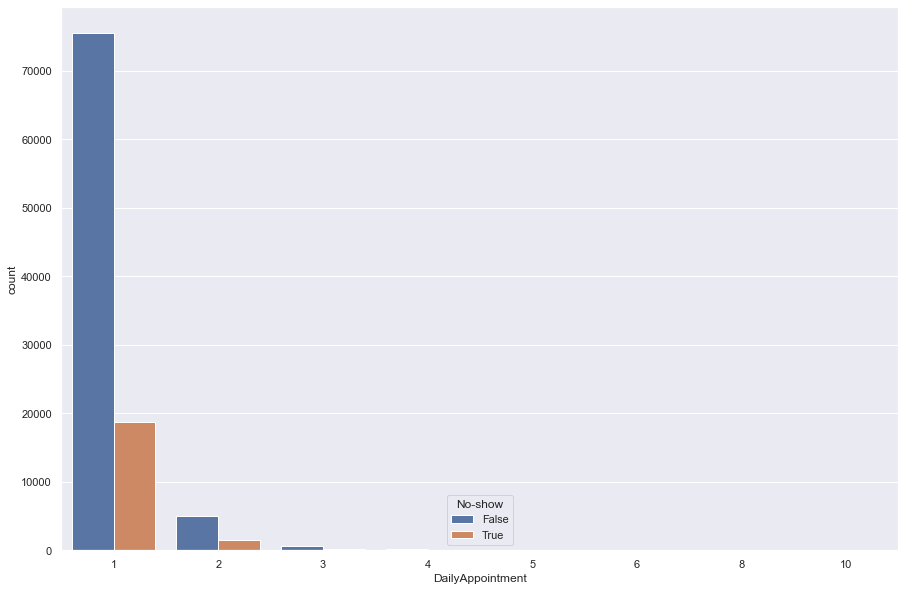

In [486]:
plt.figure(figsize=(15, 10))
ax = sns.countplot(x="DailyAppointment", hue="No-show", data=merge2)
plt.show()

In [487]:
noshowyes=merge2[merge2['No-show']==True]["DailyAppointment"]
noshowno=merge2[merge2['No-show']==False]["DailyAppointment"]

#### Aynı güne birden fazla randevu alanların katılım oranı

In [488]:


plt.figure(figsize=(20, 15))
dayapprate=noshowyes.value_counts()/(noshowno.value_counts()+noshowyes.value_counts())*100
import plotly.express as px

fig = px.bar(data_frame=dayapprate, 
             x=dayapprate.index, 
             y=dayapprate.values,title="The non-participation rate of customers who made an appointment on the same date",
                 labels={"index": "How many appointments were made on the same date?",  
                         "y": "Rate of not attending to appointment"})

fig.show()


<Figure size 1440x1080 with 0 Axes>

#### 13-Burs alanların randevuya katılma oranları (0=Burssuz 1=Burslu)

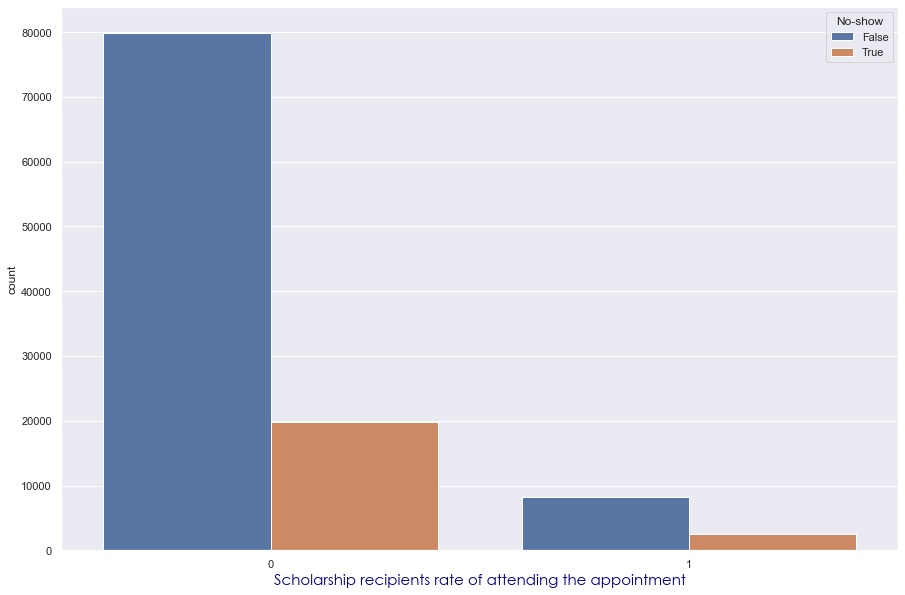

In [489]:
plt.figure(figsize=(15, 10))
ax = sns.countplot(x="Scholarship", hue="No-show", data=df)
plt.xlabel('Scholarship recipients rate of attending the appointment',fontdict = axis_style)

plt.show()

Scholarship=0 rate

In [490]:
yscolarshipn=df[(df["Scholarship"]==1) & (df["No-show"]==False)]['No-show'].count()
yscolarshipy=df[(df["Scholarship"]==1) & (df["No-show"]==True)]['No-show'].count()

nscolarshipn=df[(df["Scholarship"]==0) & (df["No-show"]==False)]['No-show'].count()
nscolarshipy=df[(df["Scholarship"]==0) & (df["No-show"]==True)]['No-show'].count()


#### Burs alanların randevuya katılma oranları (True=Burslu, False=Burssuz )

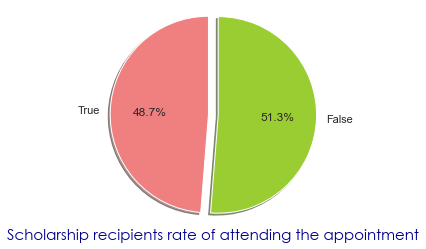

In [491]:
yscolar=yscolarshipn/(yscolarshipn+yscolarshipy)*100
nscolar=nscolarshipn/(nscolarshipn+nscolarshipy)*100

labels = 'True', 'False'
sizes = [yscolar, nscolar]
explode = (0.1, 0)  


fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels,colors=colors, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal') 
plt.xlabel('Scholarship recipients rate of attending the appointment',fontdict = axis_style)

plt.show()

>The rate of those who do not receive a scholarship to attend the appointment

#### 14-Randevu günlerine göre katılım grafiği

In [492]:
df["Day-name"]=df.AppointmentDay.dt.day_name()

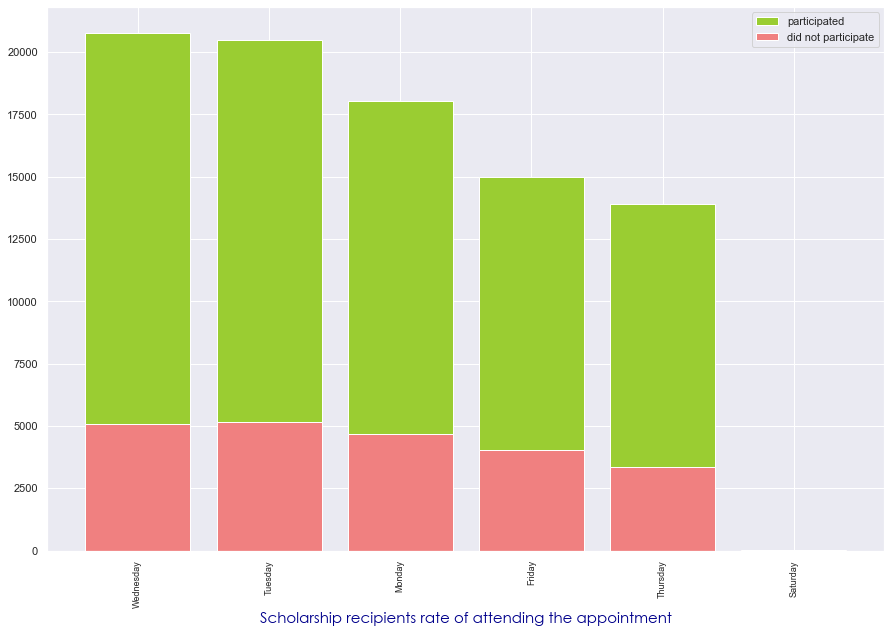

In [493]:
appdaysn=df[df["No-show"]==False]["Day-name"].value_counts()
appdaysy=df[df["No-show"]==True]["Day-name"].value_counts()
plt.figure(figsize=(15, 10))
plt.subplot(1,1,1)
plt.bar(appdaysn.index,appdaysn.values, color = "yellowgreen",label = 'participated')
plt.bar(appdaysy.index,appdaysy.values, color = "lightcoral",label = 'did not participate')
plt.xticks(rotation = 90, fontsize = 9)
plt.xlabel('Scholarship recipients rate of attending the appointment',fontdict = axis_style)
plt.legend()
plt.show()

In [494]:
df[df["No-show"]==False].AppointmentDay.dt.day_name().value_counts()


Wednesday    20774
Tuesday      20488
Monday       18024
Friday       14982
Thursday     13909
Saturday        30
Name: AppointmentDay, dtype: int64

#### Randevuya katılım oranları
> Aşağıdaki grafiğe bakarak en çok cumartesi günleri alınan randevuların katılım oranının düşük olduğu görünmekte

In [495]:

plt.figure(figsize=(20, 15))
samedayrate=appdaysn/(appdaysn+appdaysy)*100
import plotly.express as px

fig = px.bar(data_frame=dayrate, 
             x=samedayrate.index, 
             y=samedayrate.values,title="Daily attendance chart",
                 labels={"index": "What day was an appointment",  
                         "y": "Rate of not attending to appointment"})

fig.show()


<Figure size 1440x1080 with 0 Axes>

#### 15- Sms Bilgisi (0= Sms Almayanlar 1=Sms Alanlar)

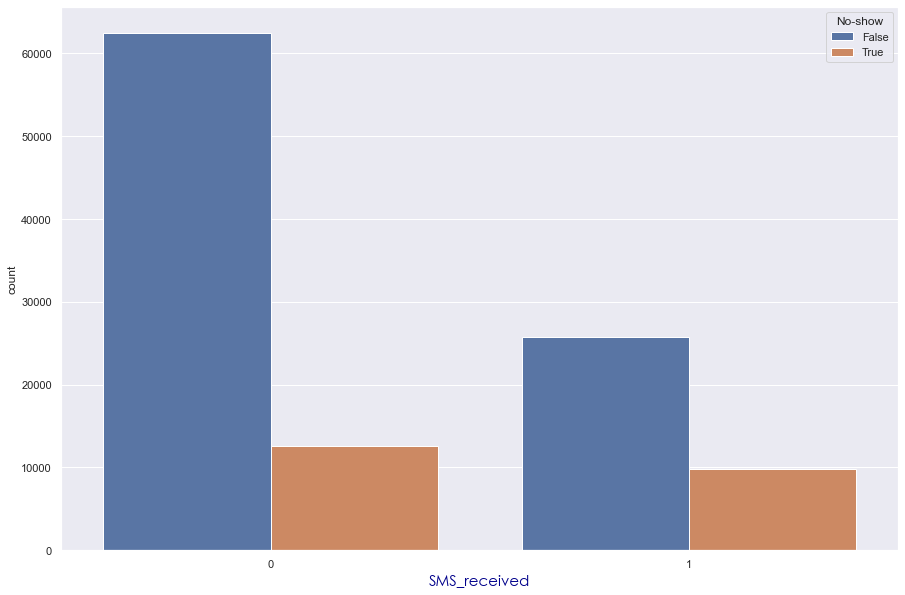

In [496]:
plt.figure(figsize=(15, 10))
ax = sns.countplot(x="SMS_received", hue="No-show", data=df)
plt.xlabel('SMS_received',fontdict = axis_style)

plt.show()

##### Sms ile randevuya gelen müşterilerin oranı

In [497]:
ysmsno=df[(df["No-show"]==False) & (df['SMS_received']>0)]["No-show"].count()
ysmsyes=df[(df["No-show"]==True) & (df['SMS_received']>0)]["No-show"].count()

In [498]:
nsmsno=df[(df["No-show"]==False) & (df['SMS_received']==0)]["No-show"].count()
nsmsyes=df[(df["No-show"]==True) & (df['SMS_received']==0)]["No-show"].count()

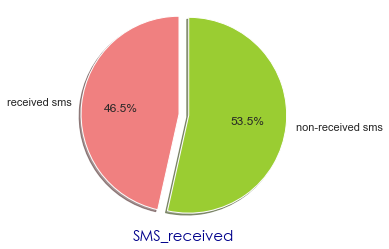

In [499]:
smsyes=ysmsno/(ysmsno+ysmsyes)*100
smsno=nsmsno/(nsmsno+nsmsyes)*100

labels = 'received sms', 'non-received sms'
sizes = [smsyes, smsno]
explode = (0.1, 0)  


fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels,colors=colors, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal') 
plt.xlabel('SMS_received',fontdict = axis_style)

plt.show()

In [500]:
chronicpatientdf=df[(df["Hipertension"]==1) | (df["Diabetes"]==1) | (df["Alcoholism"]==1) | (df["Handcap"]==1)]
notchronic=df[(df["Hipertension"]!=1) & (df["Diabetes"]!=1) & (df["Alcoholism"]!=1) & (df["Handcap"]!=1)]

##### Kronik Hastalıklar İçin "Chronic" isminde Bir Kolon Oluşturuyorum (0=Kronik Hastalığı Yok, 1=Kronik Hasta)

In [501]:
chronicpatientdf["Chronic"]=1
notchronic["Chronic"]=0
df=pd.concat([chronicpatientdf,notchronic],axis=0)

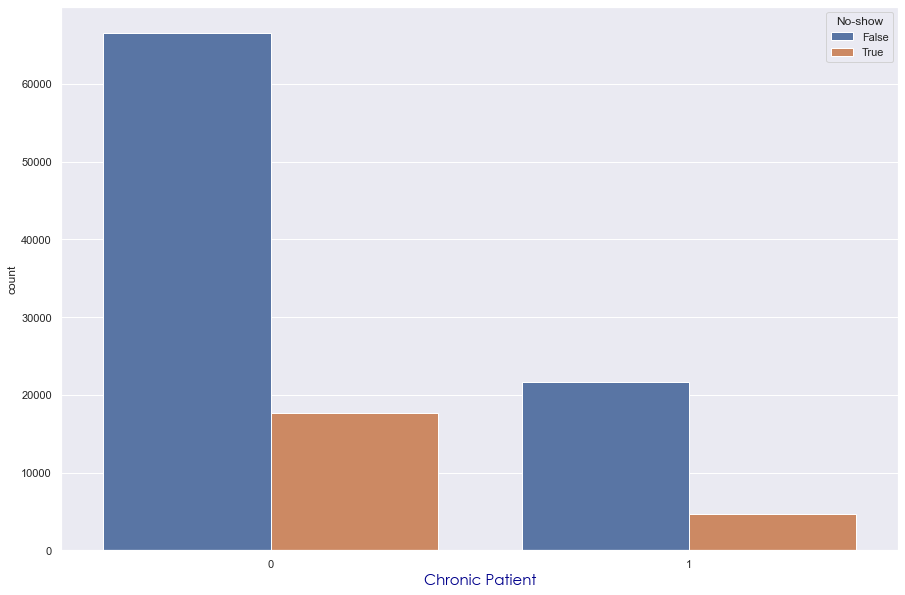

In [502]:
plt.figure(figsize=(15, 10))
ax = sns.countplot(x="Chronic", hue="No-show", data=df)
plt.xlabel('Chronic Patient',fontdict = axis_style)

plt.show()

> Chronic patient participation rate

#### 16-Randevuya gelen kronik hastalığı olan ve olmayanların oranı

In [503]:
chronicn=chronicpatientdf[chronicpatientdf["No-show"]==False]["No-show"].count()
chronicy=chronicpatientdf[chronicpatientdf["No-show"]==True]["No-show"].count()

In [504]:
notchronicn=notchronic[notchronic["No-show"]==False]["No-show"].count()
notchronicy=notchronic[notchronic["No-show"]==True]["No-show"].count()

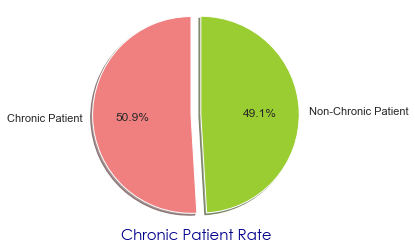

In [505]:
ychronic=chronicn/(chronicn+chronicy)*100
nchronic=notchronicn/(notchronicn+notchronicy)*100


labels = 'Chronic Patient', 'Non-Chronic Patient'
sizes = [ychronic, nchronic]
explode = (0.1, 0)  


fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels,colors=colors, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal') 
plt.xlabel('Chronic Patient Rate',fontdict = axis_style)

plt.show()

> Non-chronic patient participation rate

#### 17- Yaşlara göre Randevular

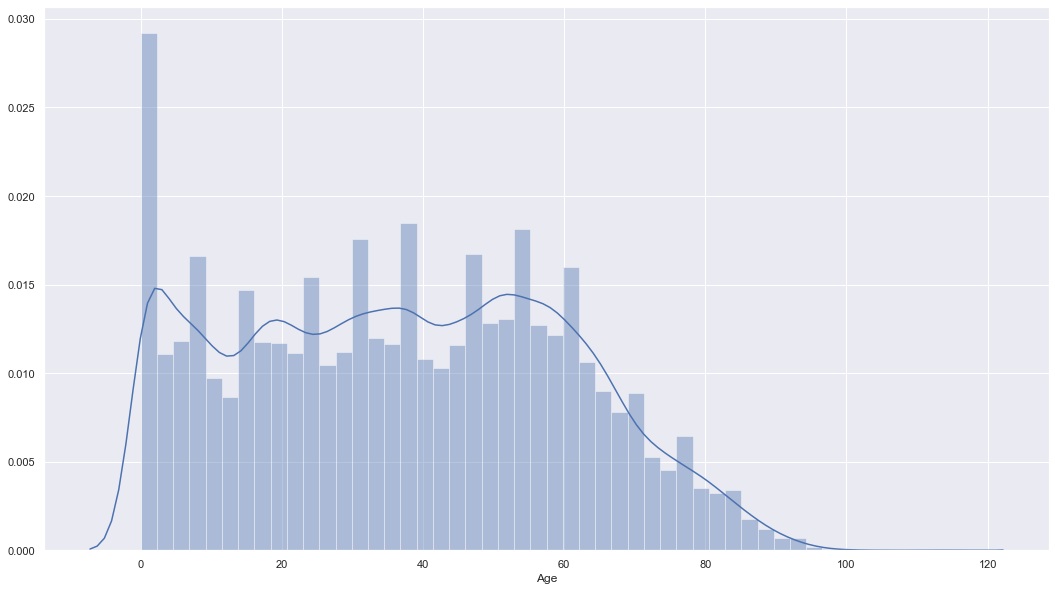

In [506]:
plt.figure(figsize=(18,10))
ax = sns.distplot(df["Age"])
plt.show()

In [507]:
agen=df[df["No-show"]==False].Age
agey=df[df["No-show"]==True].Age


#### Yaşlara göre Randevuya katılma oranları

In [508]:

plt.figure(figsize=(20, 15))
agerate=agen.value_counts()/(agey.value_counts()+agen.value_counts())*100
import plotly.express as px

fig = px.bar(data_frame=dayapprate, 
             x=agerate.index, 
             y=agerate.values,title="-",
                 labels={"index": "How many appointments were made on the same date?",  
                         "y": "Rate of not attending to appointment"})

fig.show()


<Figure size 1440x1080 with 0 Axes>

In [509]:
noshowcorr = df.corr()
display(noshowcorr)

,PatientId,AppointmentID,Gender,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,days,Chronic
PatientId,1.000000,0.004023,0.007898,-0.004121,-0.002877,-0.006436,0.001608,0.011014,-0.007915,-0.009742,-0.001456,-0.001093,-0.001070
AppointmentID,0.004023,1.000000,0.018506,-0.019106,0.022619,0.012759,0.022632,0.032946,0.014107,-0.256613,-0.162597,-0.771189,0.028626
Gender,0.007898,0.018506,1.000000,-0.106452,-0.114296,-0.055722,-0.032556,0.106166,0.022813,-0.046302,-0.004122,-0.027203,-0.022127
Age,-0.004121,-0.019106,-0.106452,1.000000,-0.092463,0.504586,0.292391,0.095810,0.078032,0.012633,-0.060327,0.032693,0.509269
Scholarship,-0.002877,0.022619,-0.114296,-0.092463,1.000000,-0.019730,-0.024894,0.035022,-0.008587,0.001192,0.029134,-0.030075,-0.009971
Hipertension,-0.006436,0.012759,-0.055722,0.504586,-0.019730,1.000000,0.433085,0.087970,0.080083,-0.006270,-0.035704,-0.018750,0.887009
Diabetes,0.001608,0.022632,-0.032556,0.292391,-0.024894,0.433085,1.000000,0.018473,0.057530,-0.014552,-0.015181,-0.028082,0.497929
Alcoholism,0.011014,0.032946,0.106166,0.095810,0.035022,0.087970,0.018473,1.000000,0.004647,-0.026149,-0.000197,-0.037822,0.316850
Handcap,-0.007915,0.014107,0.022813,0.078032,-0.008587,0.080083,0.057530,0.004647,1.000000,-0.024162,-0.006077,-0.019541,0.215800
SMS_received,-0.009742,-0.256613,-0.046302,0.012633,0.001192,-0.006270,-0.014552,-0.026149,-0.024162,1.000000,0.126428,0.388194,-0.019705


#### 18 - Yaş ile randevu alma tarihi arasındaki ilişkiyi inceleyelim

Text(0, 0.5, 'Days')

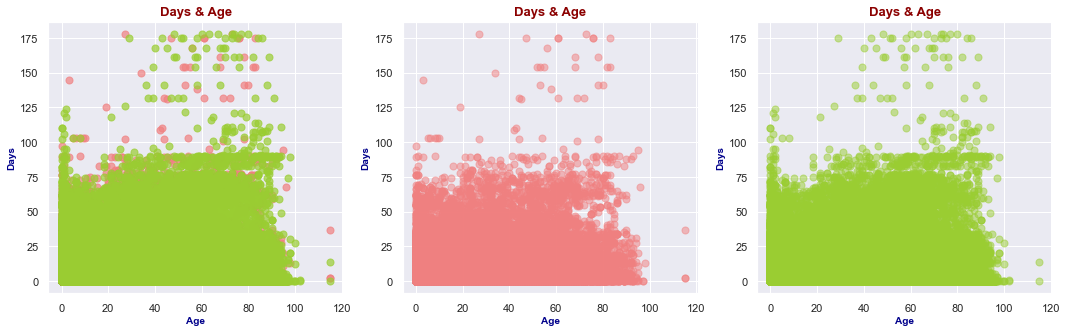

In [510]:
plt.figure(figsize=(18,5))
title_font = {'family': 'arial', 'color': 'darkred','weight': 'bold','size': 13 }
axis_font  = {'family': 'arial', 'color': 'darkblue','weight': 'bold','size': 10 }

plt.subplot(1,3,1)
plt.scatter(df[df["No-show"]==True]["Age"], df[df["No-show"]==True]["days"],color="lightcoral", s=50, alpha=0.7)
plt.title("Days & Age", fontdict=title_font)
plt.xlabel('Age', fontdict=axis_font )
plt.ylabel('Days', fontdict=axis_font )


plt.scatter(df[df["No-show"]==False]["Age"], df[df["No-show"]==False]["days"],c="yellowgreen", s=50, alpha=0.7)
plt.title("Days & Age", fontdict=title_font)
plt.xlabel('Age', fontdict=axis_font )
plt.ylabel('Days', fontdict=axis_font )

plt.subplot(1,3,2)
plt.scatter(df[df["No-show"]==True]["Age"], df[df["No-show"]==True]["days"],color="lightcoral", s=50, alpha=0.5)
plt.title("Days & Age", fontdict=title_font)
plt.xlabel('Age', fontdict=axis_font )
plt.ylabel('Days', fontdict=axis_font )

plt.subplot(1,3,3)
plt.scatter(df[df["No-show"]==False]["Age"], df[df["No-show"]==False]["days"],c="yellowgreen", s=50, alpha=0.5)
plt.title("Days & Age", fontdict=title_font)
plt.xlabel('Age', fontdict=axis_font )
plt.ylabel('Days', fontdict=axis_font )

>The graph shows the age of the patient and how many days before the hospital made an appointment. Green dots are people attending the appointment. Red dots indicate people who did not attend the appointment. By looking at this graph, we can say that patients over the age of 40 can wait more than 100 days for an appointment.

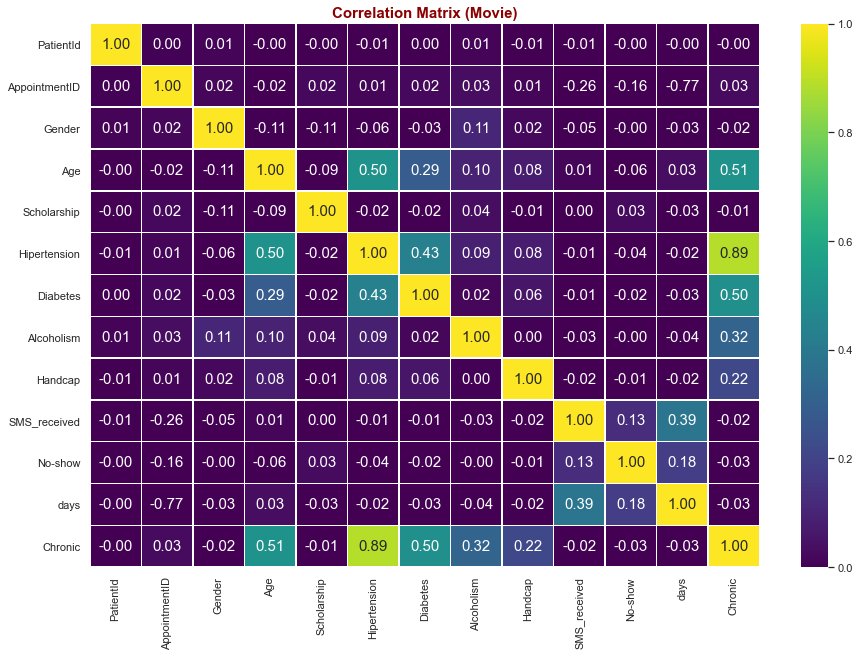

In [511]:
plt.figure(figsize=(15,10))
title_font = {'family': 'arial', 'color': 'darkred','weight': 'bold','size': 15 }
axis_font  = {'family': 'arial', 'color': 'darkblue','weight': 'bold','size': 15 }
sns.heatmap(noshowcorr, annot=True, fmt='.2f', annot_kws={"size": 15}, linewidths=.5, vmin=0, vmax=1, cmap='viridis')
plt.title("Correlation Matrix (Movie)", fontdict=title_font)

plt.show()

In [512]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score


In [513]:
import copy
olddf=copy.deepcopy(df) # orjinal halini olddf içerisinde tutuyorum

In [514]:
df["Day-name"].replace({"Monday": 1, "Tuesday": 2,"Wednesday": 3,"Thursday": 4,"Friday":5 ,"Saturday": 6},inplace=True)




### Lojistik Regresyon

In [515]:
def create_model(X, y):
    X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size=0.20, random_state=111, stratify = y)
    
    logreg_model = LogisticRegression(C= 100, penalty= 'l2')
    logreg_model.fit(X_train, y_train)

    pred_train = logreg_model.predict(X_train)
    pred_test = logreg_model.predict(X_test)
    
    conf_mtx_train = confusion_matrix(y_train, pred_train)
    conf_mtx_test = confusion_matrix(y_test, pred_test)
    
    print("Accuracy : {}\n".format(logreg_model.score(X_test, y_test)))
    
    print("Train Dataset")
    print(classification_report(y_train, pred_train))
    
    print("Test Dataset")
    print(classification_report(y_test, pred_test))
    
    return  None

## Imbalanced Data

> Randevuya katılan ve katılmayan verisinde eşitsizlik olduğu için. Dengesizliği kaldırmak için benzer verilerlerle dolduralım

#### ADASYN

In [516]:
from imblearn.over_sampling import ADASYN

y = df['No-show']
X = df.drop(['No-show','PatientId',"PatientId","Neighbourhood","AppointmentID","AppointmentDay","ScheduledDay"],axis=1)
X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size=0.20, random_state=111,stratify=y)

ad = ADASYN()
X_adasyn, y_adasyn = ad.fit_sample(X, y)
create_model(X_adasyn, y_adasyn)


Accuracy : 0.61157822191592

Train Dataset
              precision    recall  f1-score   support

       False       0.60      0.58      0.59     70566
        True       0.62      0.64      0.63     74534

    accuracy                           0.61    145100
   macro avg       0.61      0.61      0.61    145100
weighted avg       0.61      0.61      0.61    145100

Test Dataset
              precision    recall  f1-score   support

       False       0.61      0.58      0.59     17641
        True       0.62      0.64      0.63     18634

    accuracy                           0.61     36275
   macro avg       0.61      0.61      0.61     36275
weighted avg       0.61      0.61      0.61     36275



In [517]:
from imblearn.over_sampling import SMOTE
y = df['No-show']
X = df.drop(['No-show','PatientId',"PatientId","Neighbourhood","AppointmentID","AppointmentDay","ScheduledDay"],axis=1)
X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size=0.20, random_state=111,stratify=y)

sm = SMOTE(random_state=27, sampling_strategy=1.0)
X_smote, y_smote = sm.fit_sample(X, y)
create_model(X_smote, y_smote)

Accuracy : 0.6243800130374402

Train Dataset
              precision    recall  f1-score   support

       False       0.62      0.66      0.63     70565
        True       0.63      0.59      0.61     70566

    accuracy                           0.62    141131
   macro avg       0.62      0.62      0.62    141131
weighted avg       0.62      0.62      0.62    141131

Test Dataset
              precision    recall  f1-score   support

       False       0.62      0.66      0.64     17642
        True       0.63      0.59      0.61     17641

    accuracy                           0.62     35283
   macro avg       0.62      0.62      0.62     35283
weighted avg       0.62      0.62      0.62     35283



#### Smote analizi ile daha verimli sonuçlara ulaştığımız için bu veri setini kullanacağız

In [518]:
df=pd.concat([X_smote, y_smote], axis=1)

In [519]:
df

,Gender,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,days,Day-name,Chronic,No-show
0,0,62,0,1,0,0,0,0,0,5,1,False
1,0,56,0,1,1,0,0,0,0,5,1,False
2,0,76,0,1,0,0,0,0,1,5,1,False
3,1,46,0,1,0,0,0,1,2,5,1,False
4,0,45,0,1,0,0,0,0,0,5,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...
176409,1,56,1,0,0,0,0,0,0,2,0,True
176410,0,4,0,0,0,0,0,0,53,1,0,True
176411,0,19,0,0,0,0,0,1,25,1,0,True
176412,1,81,0,1,0,0,0,0,5,3,1,True


In [520]:
y = df['No-show']
X = df.drop(['No-show'],axis=1)
X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size=0.20, random_state=111,stratify=y)

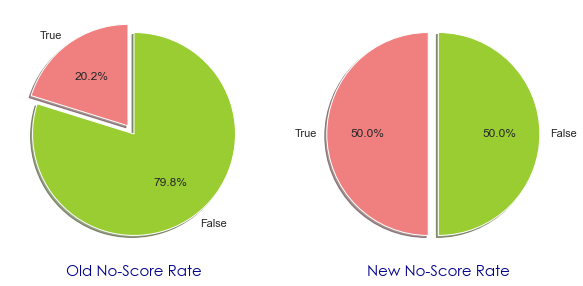

In [521]:
onstrue=olddf[olddf["No-show"]==True]["No-show"].count()
onstruepercent=nstrue/olddf["No-show"].count()*100
onsfalsepercent=100-nstruepercent

nstrue=df[df["No-show"]==True]["No-show"].count()
nstruepercent=nstrue/df["No-show"].count()*100
nsfalsepercent=100-nstruepercent


labels = 'True', 'False'
sizes = [onstruepercent, onsfalsepercent]
explode = (0.1, 0)  


fig1, ax1 = plt.subplots(nrows=1,ncols=2, figsize=(10,10))
ax1[0].pie(sizes, explode=explode, labels=labels,colors=colors, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1[0].set_xlabel('Old No-Score Rate',fontdict = axis_style)


sizes = [nstruepercent, nsfalsepercent]

ax1[1].pie(sizes, explode=explode, labels=labels,colors=colors, autopct='%1.1f%%',
        shadow=True, startangle=90) 
ax1[1].set_xlabel('New No-Score Rate',fontdict = axis_style)




plt.show()

#### Polynomial Features

In [522]:
from sklearn.preprocessing import PolynomialFeatures

pm=PolynomialFeatures()
pm.fit(X)


PolynomialFeatures()

In [523]:
pm.fit_transform

<bound method TransformerMixin.fit_transform of PolynomialFeatures()>

In [524]:
x_pol=pm.transform(X)

In [525]:
#pm.get_feature_names(X.columns)

In [526]:
x_pol_df=pd.DataFrame(x_pol,columns=pm.get_feature_names(X.columns))


In [527]:
x_pol_df


,1,Gender,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,days,...,SMS_received^2,SMS_received days,SMS_received Day-name,SMS_received Chronic,days^2,days Day-name,days Chronic,Day-name^2,Day-name Chronic,Chronic^2
0,1.0,0.0,62.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,25.0,5.0,1.0
1,1.0,0.0,56.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,25.0,5.0,1.0
2,1.0,0.0,76.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,5.0,1.0,25.0,5.0,1.0
3,1.0,1.0,46.0,0.0,1.0,0.0,0.0,0.0,1.0,2.0,...,1.0,2.0,5.0,1.0,4.0,10.0,2.0,25.0,5.0,1.0
4,1.0,0.0,45.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,25.0,5.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
176409,1.0,1.0,56.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0
176410,1.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,53.0,...,0.0,0.0,0.0,0.0,2809.0,53.0,0.0,1.0,0.0,0.0
176411,1.0,0.0,19.0,0.0,0.0,0.0,0.0,0.0,1.0,25.0,...,1.0,25.0,1.0,0.0,625.0,25.0,0.0,1.0,0.0,0.0
176412,1.0,1.0,81.0,0.0,1.0,0.0,0.0,0.0,0.0,5.0,...,0.0,0.0,0.0,0.0,25.0,15.0,5.0,9.0,3.0,1.0


#### Lojistik Regresyon (Polynomial Feature)

In [528]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(solver='lbfgs')

from sklearn.model_selection import train_test_split
##X = df["Age","Hipertension","SMS_received","days","Gender SMS_received","Age Hipertension","Age days","Age Chronic","Scholarship Handcap","Scholarship days","Hipertension days","Hipertension Chronic",""]

y = df['No-show']
X = x_pol_df
X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size=0.20, random_state=111,stratify=y)


create_model(X,y)
#log_reg.fit(X_train, y_train)

#train_accuracy = log_reg.score(X_train, y_train)
#test_accuracy = log_reg.score(X_test, y_test)

#print('One-vs.-Rest', '-'*30, 
#      'Accuracy on Train Data : {:.2f}'.format(train_accuracy), 
#      'Accuracy on Test Data  : {:.2f}'.format(test_accuracy), sep='\n')

Accuracy : 0.6479891165717201

Train Dataset
              precision    recall  f1-score   support

       False       0.65      0.64      0.65     70565
        True       0.65      0.67      0.66     70566

    accuracy                           0.65    141131
   macro avg       0.65      0.65      0.65    141131
weighted avg       0.65      0.65      0.65    141131

Test Dataset
              precision    recall  f1-score   support

       False       0.65      0.63      0.64     17642
        True       0.64      0.67      0.65     17641

    accuracy                           0.65     35283
   macro avg       0.65      0.65      0.65     35283
weighted avg       0.65      0.65      0.65     35283



#### Lojistik Regresyon (Polinomial Feature Olmadan)

In [529]:
y = df['No-show']
X = df.drop(['No-show'],axis=1)
X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size=0.20, random_state=111,stratify=y)

create_model(X,y)

Accuracy : 0.6243800130374402

Train Dataset
              precision    recall  f1-score   support

       False       0.62      0.66      0.63     70565
        True       0.63      0.59      0.61     70566

    accuracy                           0.62    141131
   macro avg       0.62      0.62      0.62    141131
weighted avg       0.62      0.62      0.62    141131

Test Dataset
              precision    recall  f1-score   support

       False       0.62      0.66      0.64     17642
        True       0.63      0.59      0.61     17641

    accuracy                           0.62     35283
   macro avg       0.62      0.62      0.62     35283
weighted avg       0.62      0.62      0.62     35283



> Polynomial Features ile Oluşturduğumuz yeni Feature'lar sayesinde (Model1) tahmin değerlerimiz bir miktar daha arttı. Buyüzden bu featuresları kullanacağız

In [530]:
y = df['No-show']
X = x_pol_df
X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size=0.20, random_state=111,stratify=y)


#### Hyperparameter tuning

In [531]:
log_reg = LogisticRegression()

print(log_reg.get_params())

{'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': None, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}


In [532]:
parameters = {"C": [10 ** x for x in range (-5, 5, 1)],
              "penalty": ['l1', 'l2']
             }

### GridSearch

In [533]:
from sklearn.model_selection import GridSearchCV

grid_cv = GridSearchCV(estimator=log_reg,
                       param_grid = parameters,
                       cv = 5,verbose=1,
                       refit = True,
                       
                      )

grid_cv.fit(X, y)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  2.7min finished


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100,
                               1000, 10000],
                         'penalty': ['l1', 'l2']},
             verbose=1)

In [534]:
print("Best Parameters : ", grid_cv.best_params_)
print("Best Score      : ", grid_cv.best_score_)
 

Best Parameters :  {'C': 0.01, 'penalty': 'l2'}
Best Score      :  0.5907865701729074


In [535]:
print("Best Score      : ", grid_cv.score(X,y))

Best Score      :  0.6439511603387487


In [536]:
logreg_model = LogisticRegression(C= 0.01, penalty= 'l2')
logreg_model.fit(X_train, y_train)
print("Best Score      : ", logreg_model.score(X,y))

Best Score      :  0.6434920131055358


In [537]:
y = list(y)


### Random Forest

In [538]:
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier(n_estimators=25, random_state=111)
random_forest.fit(X_train, y_train) 

RandomForestClassifier(n_estimators=25, random_state=111)

#### Feature'ların önem derecelerini görüntüleyelim

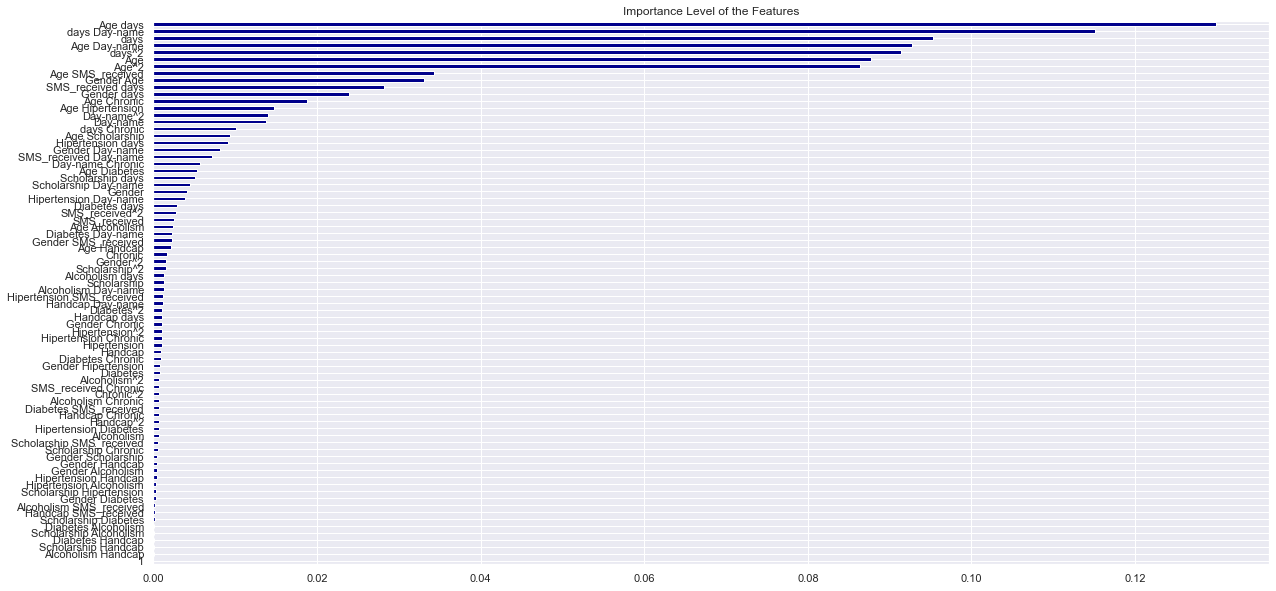

In [539]:
plt.figure(figsize=(20,10))
importance_level = pd.Series(data=random_forest.feature_importances_,
                        index= X_train.columns)

importance_level_sorted = importance_level.sort_values()

importance_level_sorted.plot(kind='barh', color='darkblue')
plt.title('Importance Level of the Features')
plt.show()

In [540]:
importance_level_sorted

1                         0.000000
Alcoholism Handcap        0.000045
Scholarship Handcap       0.000051
Diabetes Handcap          0.000098
Scholarship Alcoholism    0.000100
                            ...   
days^2                    0.091357
Age Day-name              0.092685
days                      0.095330
days Day-name             0.115126
Age days                  0.129941
Length: 78, dtype: float64

In [541]:
importance_level_sorted=importance_level_sorted.drop('1')

In [542]:
importance_level_sorted=np.array(importance_level_sorted.index)

In [543]:
importance_level_sorted


array(['Alcoholism Handcap', 'Scholarship Handcap', 'Diabetes Handcap',
       'Scholarship Alcoholism', 'Diabetes Alcoholism',
       'Scholarship Diabetes', 'Handcap SMS_received',
       'Alcoholism SMS_received', 'Gender Diabetes',
       'Scholarship Hipertension', 'Hipertension Alcoholism',
       'Hipertension Handcap', 'Gender Alcoholism', 'Gender Handcap',
       'Gender Scholarship', 'Scholarship Chronic',
       'Scholarship SMS_received', 'Alcoholism', 'Hipertension Diabetes',
       'Handcap^2', 'Handcap Chronic', 'Diabetes SMS_received',
       'Alcoholism Chronic', 'Chronic^2', 'SMS_received Chronic',
       'Alcoholism^2', 'Diabetes', 'Gender Hipertension',
       'Diabetes Chronic', 'Handcap', 'Hipertension',
       'Hipertension Chronic', 'Hipertension^2', 'Gender Chronic',
       'Handcap days', 'Diabetes^2', 'Handcap Day-name',
       'Hipertension SMS_received', 'Alcoholism Day-name', 'Scholarship',
       'Alcoholism days', 'Scholarship^2', 'Gender^2', 'Chronic',


In [544]:
x_pol_df[['Alcoholism Handcap', 'Scholarship Handcap', 'Diabetes Alcoholism',
       'Scholarship Alcoholism', 'Diabetes Handcap',
       'Scholarship Diabetes', 'Handcap SMS_received',
       'Diabetes SMS_received', 'Gender Diabetes',
       'Alcoholism SMS_received', 'Hipertension Handcap',
       'Gender Alcoholism', 'Gender Handcap', 'Hipertension Alcoholism',
       'Scholarship Hipertension', 'Scholarship Chronic', 'Alcoholism^2',
       'Gender Scholarship', 'Scholarship SMS_received',
       'Hipertension SMS_received', 'Hipertension Diabetes',
       'Alcoholism Chronic', 'Hipertension Chronic', 'Diabetes',
       'SMS_received Chronic', 'Handcap^2', 'Gender Hipertension',
       'Handcap Chronic', 'Handcap', 'Alcoholism', 'Gender Chronic',
       'Diabetes Chronic', 'Handcap days', 'Chronic^2',
       'Alcoholism Day-name', 'Handcap Day-name', 'Diabetes^2',
       'Alcoholism days', 'Scholarship', 'Hipertension', 'Hipertension^2',
       'Scholarship^2', 'Age Handcap', 'Diabetes Day-name', 'Chronic',
       'Gender SMS_received', 'SMS_received', 'Age Alcoholism', 'Gender',
       'Diabetes days', 'Scholarship Day-name', 'SMS_received^2',
       'Hipertension Day-name', 'Day-name Chronic', 'Gender^2',
       'Scholarship days', 'Age Diabetes', 'SMS_received Day-name',
       'Hipertension days', 'Gender Day-name', 'days Chronic',
       'Age Scholarship', 'Day-name^2', 'Day-name', 'Age Hipertension',
       'Gender days', 'Age Chronic', 'SMS_received days', 'Gender Age',
       'Age SMS_received', 'days^2', 'Age', 'Age^2', 'Age Day-name',
       'days', 'Age days', 'days Day-name']]

,Alcoholism Handcap,Scholarship Handcap,Diabetes Alcoholism,Scholarship Alcoholism,Diabetes Handcap,Scholarship Diabetes,Handcap SMS_received,Diabetes SMS_received,Gender Diabetes,Alcoholism SMS_received,...,SMS_received days,Gender Age,Age SMS_received,days^2,Age,Age^2,Age Day-name,days,Age days,days Day-name
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,62.0,3844.0,310.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,56.0,3136.0,280.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,76.0,5776.0,380.0,1.0,76.0,5.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,46.0,46.0,4.0,46.0,2116.0,230.0,2.0,92.0,10.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,45.0,2025.0,225.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
176409,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,56.0,0.0,0.0,56.0,3136.0,112.0,0.0,0.0,0.0
176410,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2809.0,4.0,16.0,4.0,53.0,212.0,53.0
176411,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,25.0,0.0,19.0,625.0,19.0,361.0,19.0,25.0,475.0,25.0
176412,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,81.0,0.0,25.0,81.0,6561.0,243.0,5.0,405.0,15.0


In [545]:
y = df['No-show']
X = x_pol_df
X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size=0.20, random_state=111,stratify=y)


#### Cross Validation

In [546]:
from sklearn.model_selection import cross_validate, cross_val_score
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score

log_reg_model = LogisticRegression()

cv = cross_validate(estimator=log_reg_model,
                    X=X,
                    y=y,
                    cv=10,
                    return_train_score=True,
                    scoring = ['accuracy','precision',"recall"]
                   )



In [547]:
print('Train Set Mean Precision : {:.2f}  '.format(cv['train_precision'].mean()))
print('Train Set Mean Recall : {:.2f}'.format(cv['train_recall'].mean()))
print('Train Set Mean Accuracy  : {:.2f}\n  '.format(cv['train_accuracy'].mean()))


print('Test Set Mean Precision  : {:.2f}  '.format(cv['test_precision'].mean()))
print('Test Set Mean Recall : {:.2f}'.format(cv['test_recall'].mean()))
print('Test Set Mean Accuracy   : {:.2f}  '.format(cv['test_accuracy'].mean()))



Train Set Mean Precision : 0.65  
Train Set Mean Recall : 0.65
Train Set Mean Accuracy  : 0.65
  
Test Set Mean Precision  : 0.61  
Test Set Mean Recall : 0.65
Test Set Mean Accuracy   : 0.62  


### KNN

In [548]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 1)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [549]:
knn.score(X_test, y_test)


0.7155003826205255

In [550]:
from sklearn.model_selection import cross_val_score
cvscores_3 = cross_val_score(knn, X_test, y_test, cv=3)
print('cv =  3 ---> Average cross validation score : ', np.mean(cvscores_3))

# Perform 10-fold CV
cvscores_10 = cross_val_score(knn, X_test, y_test, cv=10)
print('cv = 10 ---> Average cross validation score  : ', np.mean(cvscores_10))

cv =  3 ---> Average cross validation score :  0.6577388544058045
cv = 10 ---> Average cross validation score  :  0.6636623644451641


In [551]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import pydotplus

compare_decision_tree = DecisionTreeClassifier(criterion='entropy',
                                     max_depth=3,random_state = 111)
compare_decision_tree.fit(X_train, y_train)

compare_log_reg = LogisticRegression()
compare_log_reg.fit(X_train, y_train)

LogisticRegression()

In [552]:
from sklearn.metrics import accuracy_score
y_predict_dt = compare_decision_tree.predict(X_test)
y_predict_lr = compare_log_reg.predict(X_test)

print("Decision Tree Accuracy        : {:.4f}".format(accuracy_score(y_test, y_predict_dt)))
print("Logistic Regression Accuracy : {:.4f}".format(accuracy_score(y_test, y_predict_lr)))

Decision Tree Accuracy        : 0.6708
Logistic Regression Accuracy : 0.6553


In [553]:
from sklearn.metrics import accuracy_score
y_predict = random_forest.predict(X_test)
print("Accuracy of the Random Forest : {:.4f}".format(accuracy_score(y_test, y_predict)))

Accuracy of the Random Forest : 0.7523


In [554]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate

In [555]:
oversampler=SMOTE(random_state=0)
smote_train, smote_target = oversampler.fit_sample(X_train,y_train)

In [556]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate

In [557]:
#!pip install ipywidgets 


In [558]:
#from sklearn.metrics import accuracy_score
#y_pred= svc.predict(X_test)
#print("Accuracy Rate of SVC: {:.2f}".format(accuracy_score(y_test, y_pred)))

In [559]:
#!jupyter nbextension enable --py widgetsnbextension
#!jupyter labextension install @jupyter-widgets/jupyterlab-manager

In [560]:
%%capture
from tqdm import tqdm_notebook as tqdm
tqdm().pandas()

In [561]:
import xgboost as xgb


#### XGBoost için Parametrelerimizi analiz edelim

In [562]:
param_test1e = {
 'learning_rate':np.arange(0,0.4,0.1),
}

xgb_model = xgb.XGBClassifier(objective= 'binary:logistic',
                              predictor = 'gpu_predictor',
                              tree_method = 'gpu_hist'
                             )
gsearch = GridSearchCV(estimator = xgb_model , 
                        param_grid = param_test1e, 
                        scoring='roc_auc', 
                        n_jobs=-1, 
                        cv=5, return_train_score = True,verbose=1)
gsearch.fit(X, y)


df_results = pd.DataFrame(gsearch.cv_results_['params'])
df_results['mean_test_score'] = gsearch.cv_results_['mean_test_score']
df_results['mean_train_score'] = gsearch.cv_results_['mean_train_score']
df_results.sort_values('mean_test_score', ascending = False)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:  2.9min finished


,learning_rate,mean_test_score,mean_train_score
3,0.3,0.687910,0.802380
2,0.2,0.681434,0.790957
1,0.1,0.672200,0.776652
0,0.0,0.500000,0.500000


In [563]:
param_test1 = {
 'max_depth':range(1,11,1),
 'min_child_weight':range(1,2)
}

xgb_model = xgb.XGBClassifier(objective= 'binary:logistic',
                              learning_rate=0.3,
                              predictor = 'gpu_predictor',
                              tree_method = 'gpu_hist'
                             )
gsearch = GridSearchCV(estimator = xgb_model , 
                        param_grid = param_test1, 
                        scoring='roc_auc', 
                        n_jobs=-1, 
                        cv=5, return_train_score = True,verbose=1)
gsearch.fit(X, y)


df_results = pd.DataFrame(gsearch.cv_results_['params'])
df_results['mean_test_score'] = gsearch.cv_results_['mean_test_score']
df_results['mean_train_score'] = gsearch.cv_results_['mean_train_score']
df_results.sort_values('mean_test_score', ascending = False)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  3.3min finished


,max_depth,min_child_weight,mean_test_score,mean_train_score
9,10,1,0.729511,0.868597
8,9,1,0.718490,0.852817
7,8,1,0.708110,0.837507
6,7,1,0.698794,0.820456
5,6,1,0.687910,0.802380
4,5,1,0.677526,0.787432
3,4,1,0.669977,0.773748
2,3,1,0.664450,0.763792
1,2,1,0.660963,0.755482
0,1,1,0.656866,0.746640


In [564]:
param_test3 = {
'gamma':[i for i in np.arange(0,0.6,0.05)]
}

xgb_model = xgb.XGBClassifier(objective= 'binary:logistic',
                              learning_rate=0.3,
                              max_depth = 10,
                              min_child_weight = 1,
                              predictor = 'gpu_predictor',
                              tree_method = 'gpu_hist'
                             )
gsearch = GridSearchCV(estimator = xgb_model , 
                        param_grid = param_test3, 
                        scoring='roc_auc', 
                        n_jobs=-1, 
                        cv=5, return_train_score = True,verbose=1)
gsearch.fit(X, y)


df_results = pd.DataFrame(gsearch.cv_results_['params'])
df_results['mean_test_score'] = gsearch.cv_results_['mean_test_score']
df_results['mean_train_score'] = gsearch.cv_results_['mean_train_score']
df_results.sort_values('mean_test_score', ascending = False)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  7.0min
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:  9.2min finished


,gamma,mean_test_score,mean_train_score
0,0.00,0.729511,0.868597
4,0.20,0.728462,0.868868
2,0.10,0.728329,0.868209
1,0.05,0.728287,0.868205
3,0.15,0.727888,0.866154
5,0.25,0.726923,0.866494
6,0.30,0.723738,0.860106
7,0.35,0.719608,0.854193
8,0.40,0.715728,0.849918
9,0.45,0.715429,0.846635


In [594]:
param_test4 = {
'subsample':[i for i in np.arange(0.6,1, 0.1)],
 'colsample_bytree':[i for i in np.arange(0.6,1, 0.1)]
}


xgb_model = xgb.XGBClassifier(objective= 'binary:logistic',
                              learning_rate=0.3,
                              max_depth = 2,
                              min_child_weight = 1,
                              gamma = 0,
                              predictor = 'gpu_predictor',
                              tree_method = 'gpu_hist'
                             )
gsearch = GridSearchCV(estimator = xgb_model , 
                        param_grid = param_test4, 
                        scoring='roc_auc', 
                        n_jobs=-1, 
                        cv=5, return_train_score = True,verbose=1)
gsearch.fit(X, y)


df_results = pd.DataFrame(gsearch.cv_results_['params'])
df_results['mean_test_score'] = gsearch.cv_results_['mean_test_score']
df_results['mean_train_score'] = gsearch.cv_results_['mean_train_score']
df_results.sort_values('mean_test_score', ascending = False)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   38.8s
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:  1.4min finished


,colsample_bytree,subsample,mean_test_score,mean_train_score
1,0.6,0.7,0.662699,0.755254
0,0.6,0.6,0.661733,0.755182
6,0.7,0.8,0.661669,0.755203
3,0.6,0.9,0.661592,0.755142
2,0.6,0.8,0.661460,0.755235
4,0.7,0.6,0.661302,0.755482
13,0.9,0.7,0.661240,0.755438
9,0.8,0.7,0.661156,0.755402
14,0.9,0.8,0.661101,0.755467
15,0.9,0.9,0.660971,0.755549


In [595]:
param_test6 = {
 'reg_alpha':[i for i in np.arange(0,2, 0.10)]
}

xgb_model = xgb.XGBClassifier(objective= 'binary:logistic',
                              learning_rate=0.3,
                              max_depth = 2,
                              min_child_weight = 1,
                              gamma = 0,
                              colsample_bytree = 0.6,
                              subsample = 0.7,
                              predictor = 'gpu_predictor',
                              tree_method = 'gpu_hist'
                             )
gsearch = GridSearchCV(estimator = xgb_model , 
                        param_grid = param_test6, 
                        scoring='roc_auc', 
                        n_jobs=-1, 
                        cv=5, return_train_score = True,verbose=1)
gsearch.fit(X, y)


df_results = pd.DataFrame(gsearch.cv_results_['params'])
df_results['mean_test_score'] = gsearch.cv_results_['mean_test_score']
df_results['mean_train_score'] = gsearch.cv_results_['mean_train_score']
df_results.sort_values('mean_test_score', ascending = False)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   44.2s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  1.7min finished


,reg_alpha,mean_test_score,mean_train_score
0,0.0,0.662699,0.755254
1,0.1,0.661675,0.755213
13,1.3,0.661230,0.754964
4,0.4,0.661219,0.755166
17,1.7,0.661169,0.754946
2,0.2,0.661053,0.755100
3,0.3,0.661037,0.755091
14,1.4,0.661019,0.754942
18,1.8,0.661003,0.754841
12,1.2,0.660838,0.754945


#### Bulduğumuz parametrelerde modelimizi analiz edelim

In [602]:
xgb_model = xgb.XGBClassifier(objective= 'binary:logistic',
                              learning_rate=0.3,
                              max_depth = 2,
                              min_child_weight = 1,
                              colsample_bytree = 0.6,
                              subsample = 0.7,
                              reg_alpha = 0,
                              predictor = 'gpu_predictor',
                              tree_method = 'gpu_hist'
                             )

In [603]:
from sklearn.model_selection import cross_validate

In [604]:
cv_ = cross_validate(xgb_model, X, y, cv=5, scoring = "roc_auc", return_train_score=True)
print(cv_['test_score'].mean())
print(cv_['train_score'].mean())

0.6626987906796985
0.7552536662012603


In [605]:
xgb_model.fit(X, y)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.6, gamma=0, gpu_id=0,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.3, max_delta_step=0, max_depth=2,
              min_child_weight=1, missing=nan,
              monotone_constraints='(0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0)',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              predictor='gpu_predictor', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=0.7,
              tree_method='gpu_hist', validate_parameters=1, verbosity=None)

In [606]:


    pred_train = xgb_model.predict(X_train)
    pred_test = xgb_model.predict(X_test)
    
    conf_mtx_train = confusion_matrix(y_train, pred_train)
    conf_mtx_test = confusion_matrix(y_test, pred_test)
    
    print("Accuracy : {}\n".format(xgb_model.score(X_test, y_test)))
    
    print("Train Dataset")
    print(classification_report(y_train, pred_train))
    
    print("Test Dataset")
    print(classification_report(y_test, pred_test))
    

Accuracy : 0.6900490321117819

Train Dataset
              precision    recall  f1-score   support

       False       0.73      0.60      0.66     70565
        True       0.66      0.78      0.72     70566

    accuracy                           0.69    141131
   macro avg       0.70      0.69      0.69    141131
weighted avg       0.70      0.69      0.69    141131

Test Dataset
              precision    recall  f1-score   support

       False       0.73      0.60      0.66     17642
        True       0.66      0.78      0.72     17641

    accuracy                           0.69     35283
   macro avg       0.70      0.69      0.69     35283
weighted avg       0.70      0.69      0.69     35283



In [607]:
test_prediction_proba = xgb_model.predict_proba(X_test)[:,1]


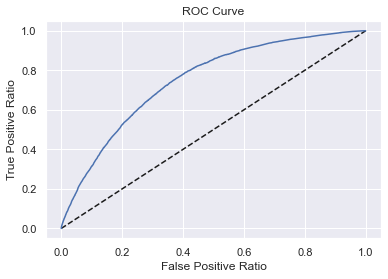

AUC value :  0.7484219972357913


In [608]:
from sklearn.metrics import roc_curve, roc_auc_score

fpr, tpr, thresholds  = roc_curve(y_test, test_prediction_proba)

import matplotlib.pyplot as plt
# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)

plt.xlabel('False Positive Ratio')
plt.ylabel('True Positive Ratio')
plt.title('ROC Curve')

plt.show()
print('AUC value : ', roc_auc_score(y_test, test_prediction_proba))


In [612]:
y_pred = xgb_model.predict(X_test)

<Figure size 432x288 with 0 Axes>

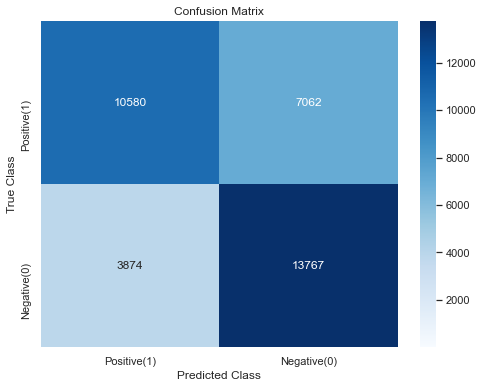

In [613]:
#Print Confusion Matrix
plt.figure()
cm = confusion_matrix(y_test,y_pred )
labels = ['Positive(1)', 'Negative(0)']
plt.figure(figsize=(8,6))
sns.heatmap(cm, xticklabels = labels, yticklabels = labels, annot = True, fmt='d', cmap="Blues", vmin = 0.2);
plt.title('Confusion Matrix')
plt.ylabel('True Class')
plt.xlabel('Predicted Class')
plt.show()

#### LightGBM

In [614]:
import lightgbm as lgb
from sklearn.metrics import confusion_matrix,accuracy_score, roc_curve, auc


In [615]:
train_data=lgb.Dataset(X_train, label=y_train)

#Select Hyper-Parameters
params = {'boosting_type': 'gbdt',
          'max_depth' : -1,
          'objective': 'binary',
          'nthread': 5,
          'num_leaves': 64,
          'learning_rate': 0.07,
          'max_bin': 512,
          'subsample_for_bin': 200,
          'subsample': 1,
          'subsample_freq': 1,
          'colsample_bytree': 0.8,
          'reg_alpha': 1.2,
          'reg_lambda': 1.2,
          'min_split_gain': 0.5,
          'min_child_weight': 1,
          'min_child_samples': 5,
          'scale_pos_weight': 1,
          'num_class' : 1,
          'metric' : 'binary_error'
          }



In [616]:
# Create parameters to search
gridParams = {
    'learning_rate': [0.07],
    'n_estimators': [8,16],
    'num_leaves': [20, 24, 27],
    'boosting_type' : ['gbdt'],
    'objective' : ['binary'],
    'random_state' : [111], 
    'colsample_bytree' : [0.64, 0.65],
    'subsample' : [0.7,0.75],
    #'reg_alpha' : [1, 1.2],
    #'reg_lambda' : [ 1.2, 1.4],
    }


In [617]:

# Create classifier to use
mdl = lgb.LGBMClassifier(boosting_type= 'gbdt',
          objective = 'binary',
          n_jobs = 5, 
          silent = True,
          max_depth = params['max_depth'],
          max_bin = params['max_bin'],
          subsample_for_bin = params['subsample_for_bin'],
          subsample = params['subsample'],
          subsample_freq = params['subsample_freq'],
          min_split_gain = params['min_split_gain'],
          min_child_weight = params['min_child_weight'],
          min_child_samples = params['min_child_samples'],
          scale_pos_weight = params['scale_pos_weight'])



In [618]:
# View the default model params:
mdl.get_params().keys()



dict_keys(['boosting_type', 'class_weight', 'colsample_bytree', 'importance_type', 'learning_rate', 'max_depth', 'min_child_samples', 'min_child_weight', 'min_split_gain', 'n_estimators', 'n_jobs', 'num_leaves', 'objective', 'random_state', 'reg_alpha', 'reg_lambda', 'silent', 'subsample', 'subsample_for_bin', 'subsample_freq', 'max_bin', 'scale_pos_weight'])

In [619]:
# Create the grid
grid = GridSearchCV(mdl, gridParams, verbose=2, cv=4, n_jobs=-1)



In [620]:
# Run the grid
grid.fit(X_train, y_train)


Fitting 4 folds for each of 24 candidates, totalling 96 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   37.3s
[Parallel(n_jobs=-1)]: Done  96 out of  96 | elapsed:   59.3s finished


GridSearchCV(cv=4,
             estimator=LGBMClassifier(max_bin=512, min_child_samples=5,
                                      min_child_weight=1, min_split_gain=0.5,
                                      n_jobs=5, objective='binary',
                                      scale_pos_weight=1, subsample=1,
                                      subsample_for_bin=200, subsample_freq=1),
             n_jobs=-1,
             param_grid={'boosting_type': ['gbdt'],
                         'colsample_bytree': [0.64, 0.65],
                         'learning_rate': [0.07], 'n_estimators': [8, 16],
                         'num_leaves': [20, 24, 27], 'objective': ['binary'],
                         'random_state': [111], 'subsample': [0.7, 0.75]},
             verbose=2)

In [621]:

# Print the best parameters found
print(grid.best_params_)
print(grid.best_score_)



{'boosting_type': 'gbdt', 'colsample_bytree': 0.65, 'learning_rate': 0.07, 'n_estimators': 16, 'num_leaves': 27, 'objective': 'binary', 'random_state': 111, 'subsample': 0.75}
0.6865606875441504


In [622]:
# Using parameters already set above, replace in the best from the grid search
params['colsample_bytree'] = grid.best_params_['colsample_bytree']
params['learning_rate'] = grid.best_params_['learning_rate']
# params['max_bin'] = grid.best_params_['max_bin']
params['num_leaves'] = grid.best_params_['num_leaves']
#params['reg_alpha'] = grid.best_params_['reg_alpha']
#params['reg_lambda'] = grid.best_params_['reg_lambda']
params['subsample'] = grid.best_params_['subsample']
# params['subsample_for_bin'] = grid.best_params_['subsample_for_bin']

print('Fitting with params: ')
print(params)



Fitting with params: 
{'boosting_type': 'gbdt', 'max_depth': -1, 'objective': 'binary', 'nthread': 5, 'num_leaves': 27, 'learning_rate': 0.07, 'max_bin': 512, 'subsample_for_bin': 200, 'subsample': 0.75, 'subsample_freq': 1, 'colsample_bytree': 0.65, 'reg_alpha': 1.2, 'reg_lambda': 1.2, 'min_split_gain': 0.5, 'min_child_weight': 1, 'min_child_samples': 5, 'scale_pos_weight': 1, 'num_class': 1, 'metric': 'binary_error'}


In [623]:
#Train model on selected parameters and number of iterations
lgbm = lgb.train(params,
                 train_data,
                 280,
                 #early_stopping_rounds= 40,
                 verbose_eval= 4
                 )

#Predict on test set
predictions_lgbm_prob = lgbm.predict(X_test)
predictions_lgbm_01 = np.where(predictions_lgbm_prob > 0.5, 1, 0) #Turn probability to 0-1 binary output



[LightGBM] [Warning] Find whitespaces in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 70566, number of negative: 70565
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.026911 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 529
[LightGBM] [Info] Number of data points in the train set: 141131, number of used features: 69
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500004 -> initscore=0.000014
[LightGBM] [Info] Start training from score 0.000014


Overall accuracy of Light GBM model: 0.7024629424935521


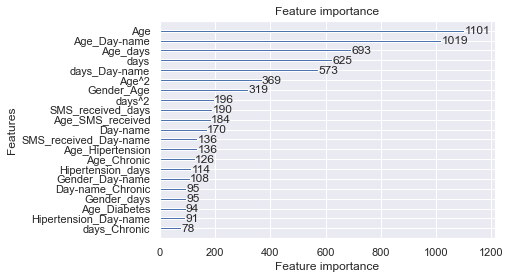

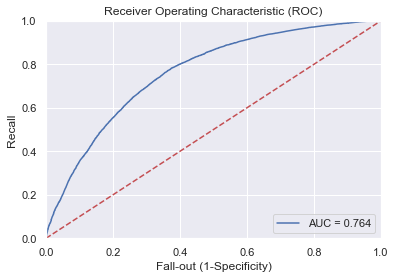

AUC score: 0.763837301916087


In [624]:
#--------------------------Print accuracy measures and variable importances----------------------
#Plot Variable Importances
lgb.plot_importance(lgbm, max_num_features=21, importance_type='split')

#Print accuracy
acc_lgbm = accuracy_score(y_test,predictions_lgbm_01)
print('Overall accuracy of Light GBM model:', acc_lgbm)

#Print Area Under Curve
plt.figure()
false_positive_rate, recall, thresholds = roc_curve(y_test, predictions_lgbm_prob)
roc_auc = auc(false_positive_rate, recall)
plt.title('Receiver Operating Characteristic (ROC)')
plt.plot(false_positive_rate, recall, 'b', label = 'AUC = %0.3f' %roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1], [0,1], 'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.ylabel('Recall')
plt.xlabel('Fall-out (1-Specificity)')
plt.show()

print('AUC score:', roc_auc)



<Figure size 432x288 with 0 Axes>

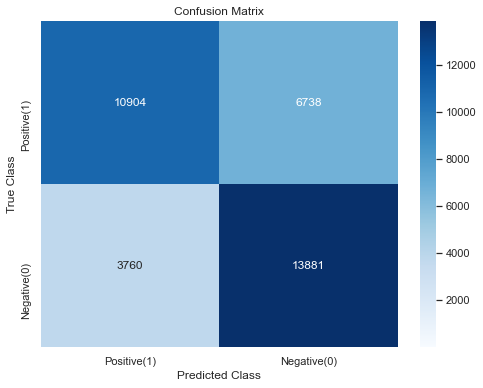

In [625]:
#Print Confusion Matrix
plt.figure()
cm = confusion_matrix(y_test, predictions_lgbm_01)
labels = ['Positive(1)', 'Negative(0)']
plt.figure(figsize=(8,6))
sns.heatmap(cm, xticklabels = labels, yticklabels = labels, annot = True, fmt='d', cmap="Blues", vmin = 0.2);
plt.title('Confusion Matrix')
plt.ylabel('True Class')
plt.xlabel('Predicted Class')
plt.show()

In [626]:
mdl = lgb.LGBMClassifier(boosting_type= 'gbdt',
          objective = 'binary',
          n_jobs = 5, 
          silent = True,
          max_depth = params['max_depth'],
          max_bin = params['max_bin'],
          subsample_for_bin = params['subsample_for_bin'],
          subsample = params['subsample'],
          subsample_freq = params['subsample_freq'],
          min_split_gain = params['min_split_gain'],
          min_child_weight = params['min_child_weight'],
          min_child_samples = params['min_child_samples'],
          scale_pos_weight = params['scale_pos_weight'] )



In [627]:
mdl.fit(X_train, y_train)

LGBMClassifier(max_bin=512, min_child_samples=5, min_child_weight=1,
               min_split_gain=0.5, n_jobs=5, objective='binary',
               scale_pos_weight=1, subsample=0.75, subsample_for_bin=200,
               subsample_freq=1)

In [628]:
    pred_train = mdl.predict(X_train)
    pred_test = mdl.predict(X_test)
    
    conf_mtx_train = confusion_matrix(y_train, pred_train)
    conf_mtx_test = confusion_matrix(y_test, pred_test)
    
    print("Accuracy : {}\n".format(mdl.score(X_test, y_test)))
    
    print("Train Dataset")
    print(classification_report(y_train, pred_train))
    
    print("Test Dataset")
    print(classification_report(y_test, pred_test))

Accuracy : 0.6989201598503528

Train Dataset
              precision    recall  f1-score   support

       False       0.75      0.62      0.68     70565
        True       0.67      0.80      0.73     70566

    accuracy                           0.71    141131
   macro avg       0.71      0.71      0.70    141131
weighted avg       0.71      0.71      0.70    141131

Test Dataset
              precision    recall  f1-score   support

       False       0.74      0.61      0.67     17642
        True       0.67      0.79      0.72     17641

    accuracy                           0.70     35283
   macro avg       0.71      0.70      0.70     35283
weighted avg       0.71      0.70      0.70     35283



In [629]:
from scipy.stats import randint as sp_randint
from scipy.stats import uniform as sp_uniform
param_test ={'num_leaves': sp_randint(6, 50), 
             'min_child_samples': sp_randint(100, 500), 
             'min_child_weight': [1e-5, 1e-3, 1e-2, 1e-1, 1, 1e1, 1e2, 1e3, 1e4],
             'subsample': sp_uniform(loc=0.2, scale=0.8), 
             'colsample_bytree': sp_uniform(loc=0.4, scale=0.6),
             'reg_alpha': [0, 1e-1, 1, 2, 5, 7, 10, 50, 100],
             'reg_lambda': [0, 1e-1, 1, 5, 10, 20, 50, 100]}

In [630]:
def learning_rate_010_decay_power_099(current_iter):
    base_learning_rate = 0.1
    lr = base_learning_rate  * np.power(.99, current_iter)
    return lr if lr > 1e-3 else 1e-3

In [631]:
import lightgbm as lgb
fit_params={"early_stopping_rounds":30, 
            "eval_metric" : 'auc', 
            "eval_set" : [(X_test,y_test)],
            'eval_names': ['valid'],
            #'callbacks': [lgb.reset_parameter(learning_rate=learning_rate_010_decay_power_099)],
            'verbose': 100,
            'categorical_feature': 'auto'}

In [632]:
#This parameter defines the number of HP points to be tested
n_HP_points_to_test = 100

import lightgbm as lgb
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

#n_estimators is set to a "large value". The actual number of trees build will depend on early stopping and 5000 define only the absolute maximum
clf = lgb.LGBMClassifier(max_depth=-1, random_state=111, silent=True, metric='None', n_jobs=-1, n_estimators=5000)
gs = RandomizedSearchCV(
    estimator=clf, param_distributions=param_test, 
    n_iter=n_HP_points_to_test,
    scoring='roc_auc',
    cv=3,
    refit=True,
    random_state=111,
    verbose=True)

In [633]:
gs.fit(X_train, y_train, **fit_params)
print('Best score reached: {} with params: {} '.format(gs.best_score_, gs.best_params_))

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Training until validation scores don't improve for 30 rounds
[100]	valid's auc: 0.753098
[200]	valid's auc: 0.757708
[300]	valid's auc: 0.760733
[400]	valid's auc: 0.762931
[500]	valid's auc: 0.764381
[600]	valid's auc: 0.765698
[700]	valid's auc: 0.766755
[800]	valid's auc: 0.767673
[900]	valid's auc: 0.76873
[1000]	valid's auc: 0.769528
[1100]	valid's auc: 0.770386
[1200]	valid's auc: 0.771056
[1300]	valid's auc: 0.77169
[1400]	valid's auc: 0.772195
[1500]	valid's auc: 0.772672
[1600]	valid's auc: 0.773278
[1700]	valid's auc: 0.773857
[1800]	valid's auc: 0.774485
[1900]	valid's auc: 0.77495
[2000]	valid's auc: 0.77547
[2100]	valid's auc: 0.775976
[2200]	valid's auc: 0.776521
[2300]	valid's auc: 0.776969
[2400]	valid's auc: 0.777283
[2500]	valid's auc: 0.777682
[2600]	valid's auc: 0.778045
[2700]	valid's auc: 0.778377
[2800]	valid's auc: 0.778717
[2900]	valid's auc: 0.779043
[3000]	valid's auc: 0.779376
[3100]	valid's auc: 0.779664
[3200]	valid's auc: 0.780115
[3300]	valid's auc: 0.78

Training until validation scores don't improve for 30 rounds
[100]	valid's auc: 0.743586
[200]	valid's auc: 0.744293
Early stopping, best iteration is:
[233]	valid's auc: 0.744375
Training until validation scores don't improve for 30 rounds
[100]	valid's auc: 0.744226
[200]	valid's auc: 0.744926
Early stopping, best iteration is:
[228]	valid's auc: 0.744983
Training until validation scores don't improve for 30 rounds
[100]	valid's auc: 0.743811
[200]	valid's auc: 0.744385
[300]	valid's auc: 0.744476
Early stopping, best iteration is:
[288]	valid's auc: 0.744477
Training until validation scores don't improve for 30 rounds
[100]	valid's auc: 0.74957
[200]	valid's auc: 0.751349
[300]	valid's auc: 0.751909
Early stopping, best iteration is:
[312]	valid's auc: 0.75191
Training until validation scores don't improve for 30 rounds
[100]	valid's auc: 0.750161
[200]	valid's auc: 0.752026
Early stopping, best iteration is:
[267]	valid's auc: 0.752562
Training until validation scores don't improve

Early stopping, best iteration is:
[3044]	valid's auc: 0.772185
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[38]	valid's auc: 0.687225
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[38]	valid's auc: 0.6874
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[31]	valid's auc: 0.687509
Training until validation scores don't improve for 30 rounds
[100]	valid's auc: 0.748858
[200]	valid's auc: 0.750503
[300]	valid's auc: 0.751161
Early stopping, best iteration is:
[296]	valid's auc: 0.751161
Training until validation scores don't improve for 30 rounds
[100]	valid's auc: 0.748915
[200]	valid's auc: 0.750446
[300]	valid's auc: 0.751006
Early stopping, best iteration is:
[276]	valid's auc: 0.751006
Training until validation scores don't improve for 30 rounds
[100]	valid's auc: 0.748455
[200]	valid's auc: 0.749984
Early stopping, best iteration is:
[

[200]	valid's auc: 0.741823
[300]	valid's auc: 0.742102
Early stopping, best iteration is:
[311]	valid's auc: 0.742116
Training until validation scores don't improve for 30 rounds
[100]	valid's auc: 0.74104
[200]	valid's auc: 0.741847
Early stopping, best iteration is:
[268]	valid's auc: 0.741914
Training until validation scores don't improve for 30 rounds
[100]	valid's auc: 0.749926
[200]	valid's auc: 0.751461
Early stopping, best iteration is:
[254]	valid's auc: 0.751891
Training until validation scores don't improve for 30 rounds
[100]	valid's auc: 0.750359
[200]	valid's auc: 0.751973
Early stopping, best iteration is:
[249]	valid's auc: 0.752239
Training until validation scores don't improve for 30 rounds
[100]	valid's auc: 0.749405
[200]	valid's auc: 0.751074
Early stopping, best iteration is:
[215]	valid's auc: 0.75121
Training until validation scores don't improve for 30 rounds
[100]	valid's auc: 0.744175
[200]	valid's auc: 0.744758
Early stopping, best iteration is:
[253]	valid

[200]	valid's auc: 0.763338
[300]	valid's auc: 0.766738
[400]	valid's auc: 0.769158
[500]	valid's auc: 0.771277
[600]	valid's auc: 0.772728
[700]	valid's auc: 0.774008
[800]	valid's auc: 0.775283
[900]	valid's auc: 0.776446
[1000]	valid's auc: 0.777505
[1100]	valid's auc: 0.778381
[1200]	valid's auc: 0.779239
[1300]	valid's auc: 0.780107
[1400]	valid's auc: 0.78083
[1500]	valid's auc: 0.781466
[1600]	valid's auc: 0.781966
[1700]	valid's auc: 0.782604
[1800]	valid's auc: 0.783198
[1900]	valid's auc: 0.783661
[2000]	valid's auc: 0.784188
[2100]	valid's auc: 0.78457
[2200]	valid's auc: 0.785124
[2300]	valid's auc: 0.785537
[2400]	valid's auc: 0.786004
[2500]	valid's auc: 0.786412
[2600]	valid's auc: 0.786799
[2700]	valid's auc: 0.787321
[2800]	valid's auc: 0.787742
[2900]	valid's auc: 0.787917
[3000]	valid's auc: 0.788219
[3100]	valid's auc: 0.788582
[3200]	valid's auc: 0.788977
Early stopping, best iteration is:
[3258]	valid's auc: 0.789152
Training until validation scores don't improve 

Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[48]	valid's auc: 0.68726
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[29]	valid's auc: 0.688154
Training until validation scores don't improve for 30 rounds
[100]	valid's auc: 0.750661
[200]	valid's auc: 0.754674
[300]	valid's auc: 0.75764
[400]	valid's auc: 0.759785
[500]	valid's auc: 0.761305
[600]	valid's auc: 0.762728
[700]	valid's auc: 0.763854
[800]	valid's auc: 0.764652
[900]	valid's auc: 0.765593
[1000]	valid's auc: 0.76632
[1100]	valid's auc: 0.76712
[1200]	valid's auc: 0.767914
[1300]	valid's auc: 0.768492
[1400]	valid's auc: 0.769015
[1500]	valid's auc: 0.769716
[1600]	valid's auc: 0.77027
[1700]	valid's auc: 0.770757
[1800]	valid's auc: 0.771338
[1900]	valid's auc: 0.771739
[2000]	valid's auc: 0.772132
[2100]	valid's auc: 0.772448
[2200]	valid's auc: 0.772891
[2300]	valid's auc: 0.773402
[2400]	valid's auc: 0.773818
[2500]	vali

Early stopping, best iteration is:
[26]	valid's auc: 0.68746
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[41]	valid's auc: 0.687151
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[35]	valid's auc: 0.687261
Training until validation scores don't improve for 30 rounds
[100]	valid's auc: 0.744674
[200]	valid's auc: 0.747154
[300]	valid's auc: 0.748897
[400]	valid's auc: 0.750104
[500]	valid's auc: 0.751335
[600]	valid's auc: 0.752209
[700]	valid's auc: 0.752975
[800]	valid's auc: 0.753687
[900]	valid's auc: 0.754271
[1000]	valid's auc: 0.754958
[1100]	valid's auc: 0.755428
[1200]	valid's auc: 0.755915
[1300]	valid's auc: 0.756303
[1400]	valid's auc: 0.7567
[1500]	valid's auc: 0.757128
[1600]	valid's auc: 0.757511
[1700]	valid's auc: 0.757865
[1800]	valid's auc: 0.758092
[1900]	valid's auc: 0.758398
[2000]	valid's auc: 0.758671
[2100]	valid's auc: 0.758987
[2200]	valid's auc: 0.759252
[2300

[1300]	valid's auc: 0.785873
[1400]	valid's auc: 0.786599
[1500]	valid's auc: 0.78732
[1600]	valid's auc: 0.787975
[1700]	valid's auc: 0.788473
[1800]	valid's auc: 0.789036
[1900]	valid's auc: 0.789485
[2000]	valid's auc: 0.790092
[2100]	valid's auc: 0.790473
[2200]	valid's auc: 0.79095
[2300]	valid's auc: 0.791328
[2400]	valid's auc: 0.791671
[2500]	valid's auc: 0.792156
[2600]	valid's auc: 0.792545
[2700]	valid's auc: 0.79288
[2800]	valid's auc: 0.793188
[2900]	valid's auc: 0.793539
[3000]	valid's auc: 0.793816
[3100]	valid's auc: 0.794026
Early stopping, best iteration is:
[3103]	valid's auc: 0.794033
Training until validation scores don't improve for 30 rounds
[100]	valid's auc: 0.758301
[200]	valid's auc: 0.764773
[300]	valid's auc: 0.769039
[400]	valid's auc: 0.772063
[500]	valid's auc: 0.774709
[600]	valid's auc: 0.776687
[700]	valid's auc: 0.778518
[800]	valid's auc: 0.779851
[900]	valid's auc: 0.781111
[1000]	valid's auc: 0.781928
[1100]	valid's auc: 0.782886
[1200]	valid's au

[100]	valid's auc: 0.744513
[200]	valid's auc: 0.745033
Early stopping, best iteration is:
[204]	valid's auc: 0.745045
Training until validation scores don't improve for 30 rounds
[100]	valid's auc: 0.752644
[200]	valid's auc: 0.757187
[300]	valid's auc: 0.760293
[400]	valid's auc: 0.762319
[500]	valid's auc: 0.764004
[600]	valid's auc: 0.76529
[700]	valid's auc: 0.766366
[800]	valid's auc: 0.767464
[900]	valid's auc: 0.768303
[1000]	valid's auc: 0.769272
[1100]	valid's auc: 0.770195
[1200]	valid's auc: 0.770966
[1300]	valid's auc: 0.771587
[1400]	valid's auc: 0.772182
[1500]	valid's auc: 0.772759
[1600]	valid's auc: 0.773394
[1700]	valid's auc: 0.77379
[1800]	valid's auc: 0.77435
[1900]	valid's auc: 0.774765
[2000]	valid's auc: 0.775276
[2100]	valid's auc: 0.775699
[2200]	valid's auc: 0.776026
[2300]	valid's auc: 0.776551
[2400]	valid's auc: 0.776868
[2500]	valid's auc: 0.777271
[2600]	valid's auc: 0.777495
[2700]	valid's auc: 0.777751
Early stopping, best iteration is:
[2679]	valid's

[1900]	valid's auc: 0.759325
[2000]	valid's auc: 0.759678
[2100]	valid's auc: 0.760007
[2200]	valid's auc: 0.760263
[2300]	valid's auc: 0.760557
[2400]	valid's auc: 0.760886
[2500]	valid's auc: 0.76109
[2600]	valid's auc: 0.761362
[2700]	valid's auc: 0.761601
[2800]	valid's auc: 0.76184
[2900]	valid's auc: 0.762058
[3000]	valid's auc: 0.762187
Early stopping, best iteration is:
[3049]	valid's auc: 0.76234
Training until validation scores don't improve for 30 rounds
[100]	valid's auc: 0.744406
[200]	valid's auc: 0.74714
[300]	valid's auc: 0.748687
[400]	valid's auc: 0.750113
[500]	valid's auc: 0.75105
[600]	valid's auc: 0.751911
[700]	valid's auc: 0.752765
[800]	valid's auc: 0.75357
[900]	valid's auc: 0.754178
[1000]	valid's auc: 0.754701
[1100]	valid's auc: 0.755168
[1200]	valid's auc: 0.75564
[1300]	valid's auc: 0.756022
[1400]	valid's auc: 0.756375
[1500]	valid's auc: 0.756882
[1600]	valid's auc: 0.757294
[1700]	valid's auc: 0.757513
[1800]	valid's auc: 0.757866
[1900]	valid's auc: 0

[600]	valid's auc: 0.764474
[700]	valid's auc: 0.765607
[800]	valid's auc: 0.766831
[900]	valid's auc: 0.767947
[1000]	valid's auc: 0.768863
[1100]	valid's auc: 0.769566
[1200]	valid's auc: 0.770313
[1300]	valid's auc: 0.770891
[1400]	valid's auc: 0.77174
[1500]	valid's auc: 0.772331
[1600]	valid's auc: 0.772863
[1700]	valid's auc: 0.773258
[1800]	valid's auc: 0.773863
[1900]	valid's auc: 0.774403
[2000]	valid's auc: 0.774738
[2100]	valid's auc: 0.775102
[2200]	valid's auc: 0.7755
[2300]	valid's auc: 0.775892
[2400]	valid's auc: 0.776215
[2500]	valid's auc: 0.776792
[2600]	valid's auc: 0.777173
[2700]	valid's auc: 0.777518
[2800]	valid's auc: 0.777794
[2900]	valid's auc: 0.778142
[3000]	valid's auc: 0.778535
[3100]	valid's auc: 0.778737
[3200]	valid's auc: 0.779015
[3300]	valid's auc: 0.779362
[3400]	valid's auc: 0.779626
Early stopping, best iteration is:
[3456]	valid's auc: 0.779777
Training until validation scores don't improve for 30 rounds
[100]	valid's auc: 0.752011
[200]	valid's

[3300]	valid's auc: 0.792891
[3400]	valid's auc: 0.793149
[3500]	valid's auc: 0.793319
[3600]	valid's auc: 0.793587
[3700]	valid's auc: 0.793807
[3800]	valid's auc: 0.794131
[3900]	valid's auc: 0.79439
[4000]	valid's auc: 0.794552
[4100]	valid's auc: 0.794727
[4200]	valid's auc: 0.794978
[4300]	valid's auc: 0.795196
[4400]	valid's auc: 0.795464
[4500]	valid's auc: 0.795699
Early stopping, best iteration is:
[4543]	valid's auc: 0.795748
Training until validation scores don't improve for 30 rounds
[100]	valid's auc: 0.759384
[200]	valid's auc: 0.76554
[300]	valid's auc: 0.769579
[400]	valid's auc: 0.772218
[500]	valid's auc: 0.774652
[600]	valid's auc: 0.776668
[700]	valid's auc: 0.778451
[800]	valid's auc: 0.779995
[900]	valid's auc: 0.781472
[1000]	valid's auc: 0.782624
[1100]	valid's auc: 0.783694
[1200]	valid's auc: 0.78466
[1300]	valid's auc: 0.78547
[1400]	valid's auc: 0.786254
[1500]	valid's auc: 0.786963
[1600]	valid's auc: 0.787591
[1700]	valid's auc: 0.788116
[1800]	valid's auc

[1000]	valid's auc: 0.753667
[1100]	valid's auc: 0.754219
[1200]	valid's auc: 0.75458
[1300]	valid's auc: 0.755018
[1400]	valid's auc: 0.755392
[1500]	valid's auc: 0.755681
[1600]	valid's auc: 0.756004
[1700]	valid's auc: 0.756252
[1800]	valid's auc: 0.756535
[1900]	valid's auc: 0.756836
[2000]	valid's auc: 0.757081
[2100]	valid's auc: 0.757309
[2200]	valid's auc: 0.75757
[2300]	valid's auc: 0.757833
[2400]	valid's auc: 0.758025
[2500]	valid's auc: 0.758274
[2600]	valid's auc: 0.758476
[2700]	valid's auc: 0.758639
[2800]	valid's auc: 0.758855
[2900]	valid's auc: 0.759007
[3000]	valid's auc: 0.759189
[3100]	valid's auc: 0.759338
[3200]	valid's auc: 0.759491
[3300]	valid's auc: 0.759664
[3400]	valid's auc: 0.759755
Early stopping, best iteration is:
[3390]	valid's auc: 0.759763
Training until validation scores don't improve for 30 rounds
[100]	valid's auc: 0.758338
[200]	valid's auc: 0.765212
[300]	valid's auc: 0.769283
[400]	valid's auc: 0.772121
[500]	valid's auc: 0.774433
[600]	valid'

[100]	valid's auc: 0.74407
[200]	valid's auc: 0.744743
[300]	valid's auc: 0.744879
Early stopping, best iteration is:
[327]	valid's auc: 0.744879
Training until validation scores don't improve for 30 rounds
[100]	valid's auc: 0.743948
[200]	valid's auc: 0.744417
[300]	valid's auc: 0.744425
Early stopping, best iteration is:
[286]	valid's auc: 0.744425
Training until validation scores don't improve for 30 rounds
[100]	valid's auc: 0.757189
[200]	valid's auc: 0.763318
[300]	valid's auc: 0.767433
[400]	valid's auc: 0.770243
[500]	valid's auc: 0.772376
[600]	valid's auc: 0.774103
[700]	valid's auc: 0.775449
[800]	valid's auc: 0.776818
[900]	valid's auc: 0.777792
[1000]	valid's auc: 0.778763
[1100]	valid's auc: 0.779639
[1200]	valid's auc: 0.780596
[1300]	valid's auc: 0.781625
[1400]	valid's auc: 0.782482
[1500]	valid's auc: 0.783078
[1600]	valid's auc: 0.783709
[1700]	valid's auc: 0.784248
[1800]	valid's auc: 0.784992
[1900]	valid's auc: 0.785432
[2000]	valid's auc: 0.785975
[2100]	valid's

[3600]	valid's auc: 0.78803
Early stopping, best iteration is:
[3616]	valid's auc: 0.788091
Training until validation scores don't improve for 30 rounds
[100]	valid's auc: 0.756244
[200]	valid's auc: 0.761346
[300]	valid's auc: 0.764183
[400]	valid's auc: 0.766682
[500]	valid's auc: 0.768629
[600]	valid's auc: 0.770404
[700]	valid's auc: 0.771473
[800]	valid's auc: 0.772494
[900]	valid's auc: 0.773698
[1000]	valid's auc: 0.774867
[1100]	valid's auc: 0.775977
[1200]	valid's auc: 0.776789
[1300]	valid's auc: 0.777647
[1400]	valid's auc: 0.778232
[1500]	valid's auc: 0.778794
[1600]	valid's auc: 0.779358
[1700]	valid's auc: 0.780028
[1800]	valid's auc: 0.780555
[1900]	valid's auc: 0.781069
[2000]	valid's auc: 0.781543
[2100]	valid's auc: 0.782051
[2200]	valid's auc: 0.78249
[2300]	valid's auc: 0.782882
[2400]	valid's auc: 0.783361
[2500]	valid's auc: 0.783711
[2600]	valid's auc: 0.784085
[2700]	valid's auc: 0.784565
[2800]	valid's auc: 0.784924
[2900]	valid's auc: 0.785242
[3000]	valid's a

[3400]	valid's auc: 0.78163
[3500]	valid's auc: 0.781956
Early stopping, best iteration is:
[3491]	valid's auc: 0.781982
Training until validation scores don't improve for 30 rounds
[100]	valid's auc: 0.757901
[200]	valid's auc: 0.765199
[300]	valid's auc: 0.769708
[400]	valid's auc: 0.772516
[500]	valid's auc: 0.775012
[600]	valid's auc: 0.777164
[700]	valid's auc: 0.778585
[800]	valid's auc: 0.780308
[900]	valid's auc: 0.781459
[1000]	valid's auc: 0.782857
[1100]	valid's auc: 0.783938
[1200]	valid's auc: 0.784666
[1300]	valid's auc: 0.785661
[1400]	valid's auc: 0.786316
[1500]	valid's auc: 0.787139
[1600]	valid's auc: 0.78773
[1700]	valid's auc: 0.788016
[1800]	valid's auc: 0.788599
[1900]	valid's auc: 0.789278
[2000]	valid's auc: 0.790024
[2100]	valid's auc: 0.790552
[2200]	valid's auc: 0.790894
[2300]	valid's auc: 0.791332
[2400]	valid's auc: 0.791784
[2500]	valid's auc: 0.792339
[2600]	valid's auc: 0.79266
[2700]	valid's auc: 0.79296
[2800]	valid's auc: 0.793404
[2900]	valid's auc

[200]	valid's auc: 0.766906
[300]	valid's auc: 0.770737
[400]	valid's auc: 0.773782
[500]	valid's auc: 0.776166
[600]	valid's auc: 0.77787
[700]	valid's auc: 0.779439
[800]	valid's auc: 0.780562
[900]	valid's auc: 0.781691
[1000]	valid's auc: 0.782741
[1100]	valid's auc: 0.78369
[1200]	valid's auc: 0.784994
[1300]	valid's auc: 0.785556
[1400]	valid's auc: 0.786231
[1500]	valid's auc: 0.786914
[1600]	valid's auc: 0.787517
[1700]	valid's auc: 0.788001
[1800]	valid's auc: 0.788589
[1900]	valid's auc: 0.789093
[2000]	valid's auc: 0.789685
[2100]	valid's auc: 0.789854
[2200]	valid's auc: 0.790274
[2300]	valid's auc: 0.790671
[2400]	valid's auc: 0.791016
[2500]	valid's auc: 0.791518
[2600]	valid's auc: 0.7919
[2700]	valid's auc: 0.792242
[2800]	valid's auc: 0.792513
[2900]	valid's auc: 0.792781
[3000]	valid's auc: 0.793149
Early stopping, best iteration is:
[3060]	valid's auc: 0.793304
Training until validation scores don't improve for 30 rounds
[100]	valid's auc: 0.760135
[200]	valid's auc:

[2600]	valid's auc: 0.785485
[2700]	valid's auc: 0.785743
[2800]	valid's auc: 0.78621
Early stopping, best iteration is:
[2820]	valid's auc: 0.786273
Training until validation scores don't improve for 30 rounds
[100]	valid's auc: 0.75716
[200]	valid's auc: 0.762672
[300]	valid's auc: 0.765894
[400]	valid's auc: 0.768361
[500]	valid's auc: 0.770309
[600]	valid's auc: 0.772058
[700]	valid's auc: 0.773643
[800]	valid's auc: 0.774834
[900]	valid's auc: 0.775822
[1000]	valid's auc: 0.776715
[1100]	valid's auc: 0.777536
[1200]	valid's auc: 0.778355
[1300]	valid's auc: 0.779025
[1400]	valid's auc: 0.779724
[1500]	valid's auc: 0.78049
[1600]	valid's auc: 0.781282
[1700]	valid's auc: 0.781996
[1800]	valid's auc: 0.782547
[1900]	valid's auc: 0.783048
[2000]	valid's auc: 0.783409
[2100]	valid's auc: 0.784003
[2200]	valid's auc: 0.784382
[2300]	valid's auc: 0.784864
[2400]	valid's auc: 0.785315
[2500]	valid's auc: 0.785635
[2600]	valid's auc: 0.785989
[2700]	valid's auc: 0.786387
[2800]	valid's au

[1200]	valid's auc: 0.776957
[1300]	valid's auc: 0.777691
[1400]	valid's auc: 0.778391
[1500]	valid's auc: 0.77911
[1600]	valid's auc: 0.779717
[1700]	valid's auc: 0.780285
[1800]	valid's auc: 0.780773
[1900]	valid's auc: 0.781267
[2000]	valid's auc: 0.781781
[2100]	valid's auc: 0.782199
[2200]	valid's auc: 0.782742
[2300]	valid's auc: 0.783204
[2400]	valid's auc: 0.78362
[2500]	valid's auc: 0.783997
[2600]	valid's auc: 0.784434
[2700]	valid's auc: 0.784717
[2800]	valid's auc: 0.785047
[2900]	valid's auc: 0.785308
[3000]	valid's auc: 0.785659
[3100]	valid's auc: 0.785829
[3200]	valid's auc: 0.786207
[3300]	valid's auc: 0.786413
Early stopping, best iteration is:
[3302]	valid's auc: 0.786416
Training until validation scores don't improve for 30 rounds
[100]	valid's auc: 0.747008
[200]	valid's auc: 0.750211
[300]	valid's auc: 0.752199
[400]	valid's auc: 0.753858
[500]	valid's auc: 0.754935
[600]	valid's auc: 0.75612
[700]	valid's auc: 0.757115
[800]	valid's auc: 0.75786
[900]	valid's auc

[4000]	valid's auc: 0.788859
[4100]	valid's auc: 0.789198
[4200]	valid's auc: 0.78945
[4300]	valid's auc: 0.789589
[4400]	valid's auc: 0.789798
[4500]	valid's auc: 0.79009
[4600]	valid's auc: 0.790211
[4700]	valid's auc: 0.790402
[4800]	valid's auc: 0.790581
[4900]	valid's auc: 0.790847
[5000]	valid's auc: 0.791017
Did not meet early stopping. Best iteration is:
[4997]	valid's auc: 0.791022
Training until validation scores don't improve for 30 rounds
[100]	valid's auc: 0.753625
[200]	valid's auc: 0.758483
[300]	valid's auc: 0.761484
[400]	valid's auc: 0.763416
[500]	valid's auc: 0.76526
[600]	valid's auc: 0.766759
[700]	valid's auc: 0.767946
[800]	valid's auc: 0.768747
[900]	valid's auc: 0.769703
[1000]	valid's auc: 0.770349
[1100]	valid's auc: 0.771256
[1200]	valid's auc: 0.772185
[1300]	valid's auc: 0.772857
[1400]	valid's auc: 0.7735
[1500]	valid's auc: 0.774019
[1600]	valid's auc: 0.774656
Early stopping, best iteration is:
[1611]	valid's auc: 0.774718
Training until validation sco

[1700]	valid's auc: 0.783485
[1800]	valid's auc: 0.784095
[1900]	valid's auc: 0.784616
[2000]	valid's auc: 0.78516
[2100]	valid's auc: 0.785586
[2200]	valid's auc: 0.786007
[2300]	valid's auc: 0.786375
[2400]	valid's auc: 0.786751
[2500]	valid's auc: 0.787113
[2600]	valid's auc: 0.787447
[2700]	valid's auc: 0.787834
[2800]	valid's auc: 0.78812
[2900]	valid's auc: 0.78848
[3000]	valid's auc: 0.788866
[3100]	valid's auc: 0.789159
[3200]	valid's auc: 0.789461
[3300]	valid's auc: 0.789706
[3400]	valid's auc: 0.789944
[3500]	valid's auc: 0.790183
[3600]	valid's auc: 0.790474
[3700]	valid's auc: 0.790702
[3800]	valid's auc: 0.79101
[3900]	valid's auc: 0.79113
Early stopping, best iteration is:
[3886]	valid's auc: 0.791174
Training until validation scores don't improve for 30 rounds
[100]	valid's auc: 0.757955
[200]	valid's auc: 0.763144
[300]	valid's auc: 0.766606
[400]	valid's auc: 0.769006
[500]	valid's auc: 0.771007
[600]	valid's auc: 0.773137
[700]	valid's auc: 0.774631
[800]	valid's auc

Training until validation scores don't improve for 30 rounds
[100]	valid's auc: 0.756381
[200]	valid's auc: 0.761359
[300]	valid's auc: 0.764318
[400]	valid's auc: 0.766199
[500]	valid's auc: 0.767983
[600]	valid's auc: 0.769719
[700]	valid's auc: 0.771074
[800]	valid's auc: 0.772459
[900]	valid's auc: 0.773604
[1000]	valid's auc: 0.774664
[1100]	valid's auc: 0.775647
[1200]	valid's auc: 0.776696
[1300]	valid's auc: 0.7777
[1400]	valid's auc: 0.778228
[1500]	valid's auc: 0.778978
[1600]	valid's auc: 0.779635
[1700]	valid's auc: 0.780307
[1800]	valid's auc: 0.780727
[1900]	valid's auc: 0.781131
[2000]	valid's auc: 0.781726
[2100]	valid's auc: 0.78225
[2200]	valid's auc: 0.782762
[2300]	valid's auc: 0.78316
Early stopping, best iteration is:
[2271]	valid's auc: 0.783173
Training until validation scores don't improve for 30 rounds
[100]	valid's auc: 0.748156
[200]	valid's auc: 0.749674
[300]	valid's auc: 0.750406
Early stopping, best iteration is:
[296]	valid's auc: 0.750415
Training unti

[2700]	valid's auc: 0.782482
[2800]	valid's auc: 0.782756
[2900]	valid's auc: 0.783125
[3000]	valid's auc: 0.783442
[3100]	valid's auc: 0.783731
[3200]	valid's auc: 0.784029
[3300]	valid's auc: 0.784289
[3400]	valid's auc: 0.784556
[3500]	valid's auc: 0.784822
[3600]	valid's auc: 0.785006
[3700]	valid's auc: 0.785293
[3800]	valid's auc: 0.785532
[3900]	valid's auc: 0.785776
[4000]	valid's auc: 0.786018
[4100]	valid's auc: 0.786293
Early stopping, best iteration is:
[4128]	valid's auc: 0.786396
Training until validation scores don't improve for 30 rounds
[100]	valid's auc: 0.756174
[200]	valid's auc: 0.76142
[300]	valid's auc: 0.764329
[400]	valid's auc: 0.766438
[500]	valid's auc: 0.768555
[600]	valid's auc: 0.76988
[700]	valid's auc: 0.770972
[800]	valid's auc: 0.771881
[900]	valid's auc: 0.772415
Early stopping, best iteration is:
[877]	valid's auc: 0.772416
Training until validation scores don't improve for 30 rounds
[100]	valid's auc: 0.755991
[200]	valid's auc: 0.760734
[300]	vali

[1900]	valid's auc: 0.757026
[2000]	valid's auc: 0.75739
[2100]	valid's auc: 0.757563
[2200]	valid's auc: 0.757794
[2300]	valid's auc: 0.758021
[2400]	valid's auc: 0.758213
[2500]	valid's auc: 0.758416
[2600]	valid's auc: 0.758689
[2700]	valid's auc: 0.758871
[2800]	valid's auc: 0.759145
[2900]	valid's auc: 0.759302
[3000]	valid's auc: 0.759473
[3100]	valid's auc: 0.759608
[3200]	valid's auc: 0.759754
[3300]	valid's auc: 0.759932
[3400]	valid's auc: 0.760116
[3500]	valid's auc: 0.760307
[3600]	valid's auc: 0.760454
[3700]	valid's auc: 0.760583
[3800]	valid's auc: 0.760708
[3900]	valid's auc: 0.760884
[4000]	valid's auc: 0.761073
[4100]	valid's auc: 0.761258
Early stopping, best iteration is:
[4142]	valid's auc: 0.761356
Training until validation scores don't improve for 30 rounds
[100]	valid's auc: 0.7441
[200]	valid's auc: 0.746971
[300]	valid's auc: 0.748734
[400]	valid's auc: 0.749993
[500]	valid's auc: 0.751033
[600]	valid's auc: 0.751899
[700]	valid's auc: 0.752614
[800]	valid's a

[1500]	valid's auc: 0.769599
[1600]	valid's auc: 0.770203
[1700]	valid's auc: 0.770808
[1800]	valid's auc: 0.77128
[1900]	valid's auc: 0.771845
[2000]	valid's auc: 0.772259
[2100]	valid's auc: 0.772694
[2200]	valid's auc: 0.773
[2300]	valid's auc: 0.773383
[2400]	valid's auc: 0.773739
[2500]	valid's auc: 0.774067
[2600]	valid's auc: 0.774445
[2700]	valid's auc: 0.774795
[2800]	valid's auc: 0.7752
[2900]	valid's auc: 0.775516
[3000]	valid's auc: 0.775785
[3100]	valid's auc: 0.776104
[3200]	valid's auc: 0.776405
[3300]	valid's auc: 0.776665
[3400]	valid's auc: 0.777008
[3500]	valid's auc: 0.777263
[3600]	valid's auc: 0.777533
[3700]	valid's auc: 0.777872
[3800]	valid's auc: 0.778108
[3900]	valid's auc: 0.778391
[4000]	valid's auc: 0.778656
[4100]	valid's auc: 0.778933
[4200]	valid's auc: 0.779094
[4300]	valid's auc: 0.77928
[4400]	valid's auc: 0.77956
[4500]	valid's auc: 0.779779
[4600]	valid's auc: 0.780035
[4700]	valid's auc: 0.780255
[4800]	valid's auc: 0.780464
[4900]	valid's auc: 0.

[4400]	valid's auc: 0.794489
[4500]	valid's auc: 0.794641
[4600]	valid's auc: 0.794792
[4700]	valid's auc: 0.795029
[4800]	valid's auc: 0.795197
[4900]	valid's auc: 0.795347
[5000]	valid's auc: 0.795472
Did not meet early stopping. Best iteration is:
[4992]	valid's auc: 0.795485
Training until validation scores don't improve for 30 rounds
[100]	valid's auc: 0.744449
[200]	valid's auc: 0.74694
[300]	valid's auc: 0.748593
[400]	valid's auc: 0.750004
[500]	valid's auc: 0.751058
[600]	valid's auc: 0.751997
[700]	valid's auc: 0.752723
[800]	valid's auc: 0.753403
[900]	valid's auc: 0.754066
[1000]	valid's auc: 0.754565
[1100]	valid's auc: 0.755118
[1200]	valid's auc: 0.755614
[1300]	valid's auc: 0.756032
[1400]	valid's auc: 0.756424
[1500]	valid's auc: 0.756785
[1600]	valid's auc: 0.757175
[1700]	valid's auc: 0.757514
[1800]	valid's auc: 0.757851
[1900]	valid's auc: 0.758136
[2000]	valid's auc: 0.758365
[2100]	valid's auc: 0.758688
[2200]	valid's auc: 0.758922
[2300]	valid's auc: 0.759123
[2

[1700]	valid's auc: 0.790304
[1800]	valid's auc: 0.790875
[1900]	valid's auc: 0.791438
[2000]	valid's auc: 0.791847
[2100]	valid's auc: 0.792127
[2200]	valid's auc: 0.792534
[2300]	valid's auc: 0.792905
[2400]	valid's auc: 0.793224
Early stopping, best iteration is:
[2379]	valid's auc: 0.793264
Training until validation scores don't improve for 30 rounds
[100]	valid's auc: 0.76032
[200]	valid's auc: 0.766601
[300]	valid's auc: 0.771137
[400]	valid's auc: 0.774008
[500]	valid's auc: 0.776186
[600]	valid's auc: 0.778199
[700]	valid's auc: 0.780009
[800]	valid's auc: 0.781585
[900]	valid's auc: 0.78273
[1000]	valid's auc: 0.78371
[1100]	valid's auc: 0.784744
[1200]	valid's auc: 0.78543
[1300]	valid's auc: 0.786401
[1400]	valid's auc: 0.787306
[1500]	valid's auc: 0.787971
[1600]	valid's auc: 0.788747
[1700]	valid's auc: 0.789478
[1800]	valid's auc: 0.79006
[1900]	valid's auc: 0.790617
[2000]	valid's auc: 0.791044
[2100]	valid's auc: 0.791525
[2200]	valid's auc: 0.791795
[2300]	valid's auc:

[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed: 106.3min finished


Training until validation scores don't improve for 30 rounds
[100]	valid's auc: 0.758413
[200]	valid's auc: 0.765946
[300]	valid's auc: 0.77164
[400]	valid's auc: 0.775491
[500]	valid's auc: 0.778821
[600]	valid's auc: 0.781408
[700]	valid's auc: 0.783694
[800]	valid's auc: 0.786111
[900]	valid's auc: 0.787954
[1000]	valid's auc: 0.789444
[1100]	valid's auc: 0.790845
[1200]	valid's auc: 0.792112
[1300]	valid's auc: 0.793292
[1400]	valid's auc: 0.794403
[1500]	valid's auc: 0.795417
[1600]	valid's auc: 0.796218
[1700]	valid's auc: 0.79706
[1800]	valid's auc: 0.798081
[1900]	valid's auc: 0.798713
[2000]	valid's auc: 0.799484
[2100]	valid's auc: 0.80007
[2200]	valid's auc: 0.800656
[2300]	valid's auc: 0.801257
[2400]	valid's auc: 0.801679
[2500]	valid's auc: 0.80237
[2600]	valid's auc: 0.803008
[2700]	valid's auc: 0.803519
[2800]	valid's auc: 0.803906
[2900]	valid's auc: 0.804355
[3000]	valid's auc: 0.804827
[3100]	valid's auc: 0.805267
[3200]	valid's auc: 0.805661
[3300]	valid's auc: 0.80

In [634]:
opt_parameters = {'colsample_bytree': 0.7916380440478592, 'min_child_samples': 211, 'min_child_weight': 1, 'num_leaves': 45, 'reg_alpha': 2, 'reg_lambda': 20, 'subsample': 0.5211522776637936}

In [635]:
params['colsample_bytree'] = 0.7916380440478592
params['min_child_samples'] = 211
params['min_child_weight'] = 1
params['num_leaves'] = 45
params['reg_alpha'] = 2
params['reg_lambda'] = 20
params['subsample'] = 0.5211522776637936

In [636]:
clf_sw = lgb.LGBMClassifier(**clf.get_params())
#set optimal parameters
clf_sw.set_params(**opt_parameters)

LGBMClassifier(colsample_bytree=0.7916380440478592, metric='None',
               min_child_samples=211, min_child_weight=1, n_estimators=5000,
               num_leaves=45, random_state=111, reg_alpha=2, reg_lambda=20,
               subsample=0.5211522776637936)

In [637]:
gs_sample_weight = GridSearchCV(estimator=clf_sw, 
                                param_grid={'scale_pos_weight':[1,2,6,12]},
                                scoring='roc_auc',
                                cv=5,
                                refit=True,
                                verbose=True)

In [638]:
gs_sample_weight.fit(X_train, y_train, **fit_params)
print('Best score reached: {} with params: {} '.format(gs_sample_weight.best_score_, gs_sample_weight.best_params_))

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Training until validation scores don't improve for 30 rounds
[100]	valid's auc: 0.760446
[200]	valid's auc: 0.76739
[300]	valid's auc: 0.771926
[400]	valid's auc: 0.774642
[500]	valid's auc: 0.777692
[600]	valid's auc: 0.779935
[700]	valid's auc: 0.781503
[800]	valid's auc: 0.783092
[900]	valid's auc: 0.784452
[1000]	valid's auc: 0.785689
[1100]	valid's auc: 0.78681
[1200]	valid's auc: 0.787769
[1300]	valid's auc: 0.788508
[1400]	valid's auc: 0.789319
[1500]	valid's auc: 0.790113
[1600]	valid's auc: 0.790997
[1700]	valid's auc: 0.791639
[1800]	valid's auc: 0.792282
[1900]	valid's auc: 0.79299
[2000]	valid's auc: 0.793526
[2100]	valid's auc: 0.794056
[2200]	valid's auc: 0.794492
[2300]	valid's auc: 0.795024
[2400]	valid's auc: 0.795321
[2500]	valid's auc: 0.795857
[2600]	valid's auc: 0.796345
[2700]	valid's auc: 0.796609
[2800]	valid's auc: 0.796839
[2900]	valid's auc: 0.797175
[3000]	valid's auc: 0.7975
[3100]	valid's auc: 0.797853
[3200]	valid's auc: 0.798099
[3300]	valid's auc: 0.798

[1100]	valid's auc: 0.787032
[1200]	valid's auc: 0.787958
[1300]	valid's auc: 0.788855
[1400]	valid's auc: 0.789878
[1500]	valid's auc: 0.790625
[1600]	valid's auc: 0.79135
[1700]	valid's auc: 0.792107
[1800]	valid's auc: 0.792743
[1900]	valid's auc: 0.793326
[2000]	valid's auc: 0.793916
[2100]	valid's auc: 0.794399
[2200]	valid's auc: 0.794979
[2300]	valid's auc: 0.795389
[2400]	valid's auc: 0.795886
[2500]	valid's auc: 0.796265
[2600]	valid's auc: 0.796773
[2700]	valid's auc: 0.797061
[2800]	valid's auc: 0.797504
[2900]	valid's auc: 0.797931
[3000]	valid's auc: 0.798281
[3100]	valid's auc: 0.798675
[3200]	valid's auc: 0.798917
[3300]	valid's auc: 0.799247
[3400]	valid's auc: 0.799431
[3500]	valid's auc: 0.799775
[3600]	valid's auc: 0.800078
[3700]	valid's auc: 0.800375
[3800]	valid's auc: 0.800534
[3900]	valid's auc: 0.800846
[4000]	valid's auc: 0.801011
[4100]	valid's auc: 0.801219
Early stopping, best iteration is:
[4165]	valid's auc: 0.801366
Training until validation scores don't

[200]	valid's auc: 0.76664
[300]	valid's auc: 0.770844
[400]	valid's auc: 0.773988
[500]	valid's auc: 0.776657
[600]	valid's auc: 0.778988
[700]	valid's auc: 0.780891
[800]	valid's auc: 0.782539
[900]	valid's auc: 0.783775
[1000]	valid's auc: 0.785115
[1100]	valid's auc: 0.786493
[1200]	valid's auc: 0.787614
[1300]	valid's auc: 0.7885
[1400]	valid's auc: 0.789265
[1500]	valid's auc: 0.790121
[1600]	valid's auc: 0.790755
[1700]	valid's auc: 0.791511
[1800]	valid's auc: 0.791819
[1900]	valid's auc: 0.792352
[2000]	valid's auc: 0.792918
[2100]	valid's auc: 0.793558
[2200]	valid's auc: 0.794236
[2300]	valid's auc: 0.794651
[2400]	valid's auc: 0.795142
[2500]	valid's auc: 0.795567
[2600]	valid's auc: 0.796041
[2700]	valid's auc: 0.7965
[2800]	valid's auc: 0.797101
[2900]	valid's auc: 0.797394
[3000]	valid's auc: 0.797715
[3100]	valid's auc: 0.797916
[3200]	valid's auc: 0.798293
[3300]	valid's auc: 0.798548
[3400]	valid's auc: 0.798961
[3500]	valid's auc: 0.799283
[3600]	valid's auc: 0.79960

[200]	valid's auc: 0.764956
[300]	valid's auc: 0.76935
[400]	valid's auc: 0.771825
[500]	valid's auc: 0.774327
[600]	valid's auc: 0.776213
[700]	valid's auc: 0.77788
[800]	valid's auc: 0.779918
[900]	valid's auc: 0.781113
[1000]	valid's auc: 0.782498
[1100]	valid's auc: 0.783567
[1200]	valid's auc: 0.784486
[1300]	valid's auc: 0.785225
[1400]	valid's auc: 0.786064
[1500]	valid's auc: 0.786991
[1600]	valid's auc: 0.787966
[1700]	valid's auc: 0.78871
[1800]	valid's auc: 0.789268
[1900]	valid's auc: 0.789876
[2000]	valid's auc: 0.790556
[2100]	valid's auc: 0.791139
[2200]	valid's auc: 0.791876
[2300]	valid's auc: 0.792386
[2400]	valid's auc: 0.792761
[2500]	valid's auc: 0.793247
[2600]	valid's auc: 0.79386
[2700]	valid's auc: 0.794223
[2800]	valid's auc: 0.794753
[2900]	valid's auc: 0.795159
[3000]	valid's auc: 0.795437
[3100]	valid's auc: 0.795678
[3200]	valid's auc: 0.796036
[3300]	valid's auc: 0.796374
[3400]	valid's auc: 0.796681
[3500]	valid's auc: 0.796928
[3600]	valid's auc: 0.7971

[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed: 14.8min finished


Training until validation scores don't improve for 30 rounds
[100]	valid's auc: 0.761594
[200]	valid's auc: 0.769068
[300]	valid's auc: 0.774379
[400]	valid's auc: 0.778128
[500]	valid's auc: 0.781085
[600]	valid's auc: 0.783373
[700]	valid's auc: 0.785709
[800]	valid's auc: 0.787452
[900]	valid's auc: 0.788847
[1000]	valid's auc: 0.790063
[1100]	valid's auc: 0.791281
[1200]	valid's auc: 0.792323
[1300]	valid's auc: 0.793469
[1400]	valid's auc: 0.794505
[1500]	valid's auc: 0.795307
[1600]	valid's auc: 0.796248
[1700]	valid's auc: 0.797133
[1800]	valid's auc: 0.797769
[1900]	valid's auc: 0.798473
[2000]	valid's auc: 0.799245
[2100]	valid's auc: 0.799792
[2200]	valid's auc: 0.800455
[2300]	valid's auc: 0.801057
[2400]	valid's auc: 0.801593
[2500]	valid's auc: 0.802073
[2600]	valid's auc: 0.802679
[2700]	valid's auc: 0.803121
[2800]	valid's auc: 0.803549
[2900]	valid's auc: 0.803977
[3000]	valid's auc: 0.80432
[3100]	valid's auc: 0.804776
[3200]	valid's auc: 0.805087
[3300]	valid's auc: 0

In [639]:
params['scale_pos_weight'] = 2

In [640]:
mdl = lgb.LGBMClassifier(boosting_type= 'gbdt',
          objective = 'binary',
          n_jobs = 5, 
          silent = True,
          max_depth = params['max_depth'],
          max_bin = params['max_bin'],
          subsample_for_bin = params['subsample_for_bin'],
          subsample = params['subsample'],
          subsample_freq = params['subsample_freq'],
          min_split_gain = params['min_split_gain'],
          min_child_weight = params['min_child_weight'],
          min_child_samples = params['min_child_samples'],
          scale_pos_weight = params['scale_pos_weight'], 
          colsample_bytree = params['colsample_bytree'],
          num_leaves = params['num_leaves'],               
          reg_alpha = params['reg_alpha'],   
          reg_lambda = params['reg_lambda']  
                         
                        )



In [641]:
mdl.fit(X_train, y_train)

LGBMClassifier(colsample_bytree=0.7916380440478592, max_bin=512,
               min_child_samples=211, min_child_weight=1, min_split_gain=0.5,
               n_jobs=5, num_leaves=45, objective='binary', reg_alpha=2,
               reg_lambda=20, scale_pos_weight=2, subsample=0.5211522776637936,
               subsample_for_bin=200, subsample_freq=1)